# **Project Name -**


<details>
<summary><b> Project Name </b>-PhonePe Pulse: Data Analysis & Insights
 </summary>

<br>

**Project Type** - EDA  

**Contribution** - Individual 

</details>


# **Project Summary -**


This project focuses on analyzing PhonePe's digital transaction data to gain business insights and understand digital payment trends across India. PhonePe, one of India’s largest digital payment platforms, provides publicly available data showing how users interact with the app in terms of transactions, user registrations, insurance purchases, and more. The objective of this project is to collect, process, analyze, and visualize this data using SQL, Python, and Streamlit.

The data was taken from the PhonePe Pulse GitHub repository, which contains detailed quarterly JSON files organized by:
- Aggregated data
- Map-based data
- Top-performing regions
Each of these files was extracted and inserted into MySQL tables. A total of 9 tables were created to store different datasets:

#### Aggregated Dataset 

| Variable             | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| `year`               | Year in which the transaction or user activity occurred.                    |
| `quarter`            | Quarter of the year (Q1 to Q4).                                             |
| `state_name`         | Name of the state where the data is recorded.                               |
| `transaction_count`  | Total number of transactions in the given period.                           |
| `transaction_amount` | Total transaction amount (in ₹) during the specified quarter.               |
| `category`           | Type of transaction (Recharge, Peer-to-Peer, Merchant payments, etc.).      |
| `device_brand`       | Mobile phone brand used to access the PhonePe app.                          |
| `user_count`         | Number of users using that brand.                                           |
| `user_percentage`    | Percentage of total users using that brand.                                 |

#### Map Dataset

| Variable             | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| `year`               | Year of the data.                                                           |
| `quarter`            | Quarter of the year (1 to 4).                                               |
| `state_name`         | State where the activity or data was recorded.                              |
| `district_name`      | Name of the district within the state.                                      |
| `transaction_count`  | Number of transactions from that district/state.                            |
| `transaction_amount` | Total transaction value from that district/state (in ₹).                    |
| `registered_users`   | Number of registered users in the area.                                     |
| `app_opens`          | Number of times the PhonePe app was opened in the region.                   |
| `insurance_count`    | Total number of insurance policies issued.                                  |
| `insurance_amount`   | Total value of insurance policies issued (in ₹).                            |

#### Top Dataset

| Variable             | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| `year`               | Year of the recorded data.                                                  |
| `quarter`            | Quarter of the year (1 to 4).                                               |
| `region_type`        | Level of data aggregation: 'state' or 'district'.                           |
| `region_name`        | Name of the region (district or state).                                     |
| `transaction_count`  | Number of transactions in the top region.                                   |
| `transaction_amount` | Total transaction amount for the region (in ₹).                             |
| `registered_users`   | Number of PhonePe registered users in the region.                           |
| `insurance_count`    | Number of insurance policies issued in the top region.                      |
| `insurance_amount`   | Total amount of insurance issued in the top region (in ₹).                  |

After storing the data in SQL, Python was used (with libraries like pandas, matplotlib, and seaborn) to generate 21+ different charts. These visualizations help explain the data in an easy and clear format.

Some key charts included:
- Top states by transaction amount
- Quarterly trend of app opens and user registrations
- Top insurance-contributing districts
- Most used device brands
- Top-performing categories like recharge, peer-to-peer, merchant payments
- Interactive visualizations were also made using Streamlit for a dashboard-like experience.





# **Github Link** 
 https://github.com/sejals23 

# **Problem Statement-**
With the increasing reliance on digital payment systems like PhonePe, understanding the dynamics of transactions, user engagement, and insurance-related data is crucial for improving services and targeting users effectively. This project aims to analyze and visualize aggregated values of payment categories, create maps for total values at state and district levels, and identify top-performing states, districts, and pin codes.


# ***1. Know Your Data*** 

#### Import Liabraries

In [2]:
# Import Libraries
import sys
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import mysql.connector
from mysql.connector import Error



# ***2. Data Wrangling***

#### Defining Directory Paths for JSON Data


In [2]:
""" aggregated_insurance_path = "pulse/data/aggregated/transaction/country/india"
aggregated_transaction_path = "pulse/data/aggregated/transaction/country/india/state"
aggregated_user_path = "pulse/data/aggregated/user/country/india/state/"
map_insurance_country_path = "pulse/data/map/insurance/country/india/state"
map_insurance_hover_path = "pulse/data/map/insurance/hover/country/india"
map_transaction_hover_path = "pulse/data/map/transaction/hover/country/india"
map_user_hover_path = "pulse/data/map/user/hover/country/india"
top_insurance_path = "pulse/data/top/insurance/country/india"
top_transaction_path = "pulse/data/top/transaction/country/india"
top_user_path = "pulse/data/top/user/country/india" 
"""

#### Inserting JSON Data into MySQL Tables




##### **a. INSERTING DATA INTO `aggregated_insurance`**

In [4]:
#connect to the MySQL database
""" try:
    conn = mysql.connector.connect(
        host='localhost',
        port=3308,
        user='root',
        password='Sejal@2005',
        database='phonepe'
    )
    cursor = conn.cursor()  

    if conn.is_connected(): 
        print(" Connected to MySQL successfully!") #Confirm connection

except Error as e:
    print("Failed to connect:", e)"""

# Import MySQL connector and error handling module
""" import mysql.connector
from mysql.connector import Error

#connect to the MySQL database
try:
    conn = mysql.connector.connect(
        host='localhost',
        port=3308,
        user='root',
        password='Sejal@2005',
        database='phonepe'
    )
    cursor = conn.cursor()  

    if conn.is_connected(): 
        print(" Connected to MySQL successfully!") #Confirm connection

except Error as e:
    print("Failed to connect:", e)

# 🔹 Loop through all year and quarter JSONs
for year_folder in os.listdir(aggregated_insurance_path):
    year_path = os.path.join(aggregated_insurance_path, year_folder)

    if os.path.isdir(year_path):
        # Loop through all quarter JSONs (1.json, 2.json, ...)
        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)
            
            # Skip non-JSONs (like folders)
            if not file.endswith('.json'):
                continue

            with open(file_path, 'r') as f:
                data = json.load(f)
                quarter = int(file.replace(".json", ""))

                # Loop through records in transactionData
                for record in data['data']['transactionData']:
                    category = record['name']
                    count = record['paymentInstruments'][0]['count']
                    amount = record['paymentInstruments'][0]['amount']

                    # Insert into MySQL
                    query = """
                        INSERT INTO aggregated_insurance (year, quarter, category, transaction_count, transaction_amount)
                        VALUES (%s, %s, %s, %s, %s)
                    """
                    values = (int(year_folder), quarter, category, count, amount)
                    cursor.execute(query, values)

# ✅ Final commit
conn.commit()
print("✅ Aggregated Insurance data inserted successfully!")"""



✅ Aggregated Insurance data inserted successfully!


##### **b. INSERTING DATA INTO `aggregated_transaction`**

In [5]:
#  Loop through all states
""" for state in os.listdir(aggregated_transaction_path):
    state_path = os.path.join(aggregated_transaction_path, state)

    #  Skip non-directory items
    if not os.path.isdir(state_path):
        continue

    #  Loop through all years
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)

        if not os.path.isdir(year_path):
            continue

        #  Loop through all quarters
        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)

            #  Skip non-JSON files
            if not file.endswith(".json"):
                continue

            with open(file_path, 'r') as f:
                data = json.load(f)

                quarter = int(file.replace(".json", ""))

                try:
                    if data['data'] and 'transactionData' in data['data']:
                        for txn in data['data']['transactionData']:
                            category = txn['name']
                            count = txn['paymentInstruments'][0]['count']
                            amount = txn['paymentInstruments'][0]['amount']

                            #  Insert query
                            insert_query = """
                                INSERT INTO aggregated_transaction
                                (year, quarter, category, transaction_count, transaction_amount)
                                VALUES (%s, %s, %s, %s, %s)
                            """
                            values = (int(year), quarter, category, count, amount)
                            cursor.execute(insert_query, values)

                except Exception as e:
                    print("⚠️ Error in:", file_path)
                    print(e)

# Commit all insertions
conn.commit()
print("✅ Aggregated Transaction data inserted successfully!")

# 6. Close MySQL connection
cursor.close()
conn.close()"""


✅ Aggregated Transaction data inserted successfully!


##### **c. INSERTING DATA INTO `aggregated_user`**

In [12]:
#  Loop through each state
""" for state_folder in os.listdir(aggregated_user_path):
    state_path = os.path.join(aggregated_user_path, state_folder)

    if not os.path.isdir(state_path):
        continue

    #  Loop through each year
    for year_folder in os.listdir(state_path):
        year_path = os.path.join(state_path, year_folder)

        if not os.path.isdir(year_path):
            continue

        #  Loop through each quarter JSON file
        for file in os.listdir(year_path):
            if not file.endswith(".json"):
                continue

            file_path = os.path.join(year_path, file)
            quarter = int(file.replace(".json", ""))

            try:
                with open(file_path, "r") as f:
                    data = json.load(f)

                registered_users = data["data"].get("registeredUsers", 0)
                app_opens = data["data"].get("appOpens", 0)
                users_by_device = data["data"].get("usersByDevice")

                #  Safe check before looping
                if users_by_device and isinstance(users_by_device, list):
                    for user in users_by_device:
                        brand = user.get("brand", "Unknown")
                        count = user.get("count", 0)
                        percentage = user.get("percentage", 0.0)

                        #  Insert into DB
                        query = """
                            INSERT INTO aggregated_user 
                            (year, quarter, registered_users, app_opens, device_brand, user_count, user_percentage)
                            VALUES (%s, %s, %s, %s, %s, %s, %s)
                        """
                        values = (
                            int(year_folder),
                            quarter,
                            registered_users,
                            app_opens,
                            brand,
                            count,
                            percentage
                        )
                        cursor.execute(query, values)
                        
            except Exception as e:
                    print("⚠️ Error in:", file_path)
                    print(e)
#  Commit to database
conn.commit()
print(" All data inserted into aggregated_user table!") """


✅ All data inserted into aggregated_user table!


##### **d. INSERTING DATA INTO `map_insurance`**

In [30]:
# ------------------- Insert from COUNTRY -------------------
# Step 1: COUNTRY data ➝ /country/india/[year]/[quarter].json
""" for year_folder in os.listdir(map_insurance_country_path):
    year_path = os.path.join(map_insurance_country_path, year_folder)
    if year_folder.isdigit() and os.path.isdir(year_path):
        year = int(year_folder)
        for file in os.listdir(year_path):
            if file.endswith(".json"):
                quarter = int(file.replace(".json", ""))
                file_path = os.path.join(year_path, file)
                try:
                    with open(file_path, "r", encoding="utf-8") as f:
                        data = json.load(f)
                        states = data.get("data", {}).get("hoverData", {})
                        for state_name, state_data in states.items():
                            insurance_count = state_data.get("registeredUsers", 0)
                            insurance_amount = state_data.get("appOpens", 0.0)
                            query = """
                                INSERT INTO map_insurance (year, quarter, state_name, insurance_count, insurance_amount)
                                VALUES (%s, %s, %s, %s, %s)
                            """
                            values = (year, quarter, state_name.lower(), insurance_count, insurance_amount)
                            cursor.execute(query, values)
                except Exception as e:
                    pass

# Step 2: STATE data ➝ /country/india/state/[state]/[year]/[quarter].json
state_root = os.path.join(map_insurance_country_path, "state")
if os.path.isdir(state_root):
    for state_folder in os.listdir(state_root):
        state_path = os.path.join(state_root, state_folder)
        if os.path.isdir(state_path):
            for year_folder in os.listdir(state_path):
                year_path = os.path.join(state_path, year_folder)
                if year_folder.isdigit() and os.path.isdir(year_path):
                    year = int(year_folder)
                    for file in os.listdir(year_path):
                        if file.endswith(".json"):
                            quarter = int(file.replace(".json", ""))
                            file_path = os.path.join(year_path, file)
                            try:
                                with open(file_path, "r", encoding="utf-8") as f:
                                    data = json.load(f)
                                    hover_list = data.get("data", {}).get("hoverDataList", [])
                                    for entry in hover_list:
                                        state_name = entry["name"]
                                        metric = entry["metric"][0]
                                        insurance_count = int(metric.get("count", 0))
                                        insurance_amount = float(metric.get("amount", 0.0))
                                        query = """
                                            INSERT INTO map_insurance (year, quarter, state_name, insurance_count, insurance_amount)
                                            VALUES (%s, %s, %s, %s, %s)
                                        """
                                        values = (year, quarter, state_name.lower(), insurance_count, insurance_amount)
                                        cursor.execute(query, values)
                            except Exception as e:
                                pass

# Step 3: HOVER ➝ /hover/country/india/[year]/[quarter].json
for year_folder in os.listdir(map_insurance_hover_path):
    year_path = os.path.join(map_insurance_hover_path, year_folder)
    if year_folder.isdigit() and os.path.isdir(year_path):
        year = int(year_folder)
        for file in os.listdir(year_path):
            if file.endswith(".json"):
                quarter = int(file.replace(".json", ""))
                file_path = os.path.join(year_path, file)
                try:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        data = json.load(f)
                        hover_data = data.get("data", {}).get("hoverDataList", [])
                        for state in hover_data:
                            state_name = state.get("name")
                            metric = state.get("metric", [])[0]
                            insurance_count = int(metric.get("count", 0))
                            insurance_amount = float(metric.get("amount", 0))
                            query = """
                                INSERT INTO map_insurance (year, quarter, state_name, insurance_count, insurance_amount)
                                VALUES (%s, %s, %s, %s, %s)
                            """
                            values = (year, quarter, state_name.lower(), insurance_count, insurance_amount)
                            cursor.execute(query, values)
                except Exception as e:
                    pass

# ✅ Commit & close
conn.commit()
cursor.close()
conn.close()

print("✅ map_insurance: Data insertion complete from country, state, and hover folders.") """



✅ map_insurance: Data insertion complete from country, state, and hover folders.


##### **e. INSERTING DATA INTO `map_transaction`**

In [35]:

# --- Loop through years and quarters ---
""" for year_folder in os.listdir(map_transaction_hover_path):
    year_path = os.path.join(map_transaction_hover_path, year_folder)
    if os.path.isdir(year_path) and year_folder.isdigit():
        year = int(year_folder)

        for file in os.listdir(year_path):
            if file.endswith(".json"):
                quarter = int(file.replace(".json", ""))
                file_path = os.path.join(year_path, file)

                try:
                    with open(file_path, "r", encoding="utf-8") as f:
                        data = json.load(f)
                        hover_data = data.get("data", {}).get("hoverDataList", [])

                        for entry in hover_data:
                            state_name = entry.get("name", "").lower()
                            metric = entry.get("metric", [])[0]
                            transaction_count = int(metric.get("count", 0))
                            transaction_amount = float(metric.get("amount", 0.0))

                            # Insert Query
                            query = """
                                INSERT INTO map_transaction (year, quarter, state_name, transaction_count, transaction_amount)
                                VALUES (%s, %s, %s, %s, %s)
                            """
                            values = (year, quarter, state_name, transaction_count, transaction_amount)
                            cursor.execute(query, values)

                except Exception:
                    pass  # Ignore errors to keep the loop going

# --- Finalize ---
conn.commit()
cursor.close()
conn.close()

print(" All hover data inserted into map_transaction successfully.")"""


✅ All hover data inserted into map_transaction successfully.


##### **f. INSERTING DATA INTO `map_user`**

In [38]:
# --- Loop through years and quarters ---
""" for year_folder in os.listdir(map_user_hover_path):
    year_path = os.path.join(map_user_hover_path, year_folder)
    if os.path.isdir(year_path) and year_folder.isdigit():
        year = int(year_folder)

        for file in os.listdir(year_path):
            if file.endswith(".json"):
                quarter = int(file.replace(".json", ""))
                file_path = os.path.join(year_path, file)

                try:
                    with open(file_path, "r", encoding="utf-8") as f:
                        data = json.load(f)
                        hover_data = data.get("data", {}).get("hoverData", {})

                        for state_name, metrics in hover_data.items():
                            registered_users = int(metrics.get("registeredUsers", 0))
                            app_opens = int(metrics.get("appOpens", 0))

                            # Insert Query
                            query = """
                                INSERT INTO map_user (year, quarter, state_name, registered_users, app_opens)
                                VALUES (%s, %s, %s, %s, %s)
                            """
                            values = (year, quarter, state_name.lower(), registered_users, app_opens)
                            cursor.execute(query, values)

                except Exception:
                    pass  # Skip any files with issues

# --- Finalize ---
conn.commit()
cursor.close()
conn.close()

print("✅ All hover data inserted into map_user table successfully.")"""


✅ All hover data inserted into map_user table successfully.


##### **g. INSERTING DATA INTO `top_insurance`**

In [42]:
# --- Loop through years and quarters ---
""" for year_folder in os.listdir(top_insurance_path):
    year_path = os.path.join(top_insurance_path, year_folder)
    if os.path.isdir(year_path) and year_folder.isdigit():
        year = int(year_folder)

        for file in os.listdir(year_path):
            if file.endswith(".json"):
                quarter = int(file.replace(".json", ""))
                file_path = os.path.join(year_path, file)

                try:
                    with open(file_path, "r", encoding="utf-8") as f:
                        data = json.load(f)

                        # 🔁 Process Districts
                        districts = data.get("data", {}).get("districts", [])
                        for item in districts:
                            region_name = item.get("name", "").strip().lower()
                            if region_name:  # ✅ Prevent inserting empty names
                                region_type = "district"
                                insurance_count = int(item.get("metric", {}).get("count", 0))
                                insurance_amount = float(item.get("metric", {}).get("amount", 0.0))

                                query = """
                                    INSERT INTO top_insurance (year, quarter, region_type, region_name, insurance_count, insurance_amount)
                                    VALUES (%s, %s, %s, %s, %s, %s)
                                """
                                values = (year, quarter, region_type, region_name, insurance_count, insurance_amount)
                                cursor.execute(query, values)

                        # 🔁 Process States (optional)
                        states = data.get("data", {}).get("states", [])
                        for item in states:
                            region_name = item.get("name", "").strip().lower()
                            if region_name:
                                region_type = "state"
                                insurance_count = int(item.get("metric", {}).get("count", 0))
                                insurance_amount = float(item.get("metric", {}).get("amount", 0.0))

                                query = """
                                    INSERT INTO top_insurance (year, quarter, region_type, region_name, insurance_count, insurance_amount)
                                    VALUES (%s, %s, %s, %s, %s, %s)
                                """
                                values = (year, quarter, region_type, region_name, insurance_count, insurance_amount)
                                cursor.execute(query, values)
                            

                except Exception as e:
                    print(f"❌ Error in file {file_path}: {e}")

# --- Finalize ---
conn.commit()
cursor.close()
conn.close()

print("✅ Data insertion into top_insurance completed successfully.") """



✅ Data insertion into top_insurance completed successfully.


##### **h. INSERTING DATA INTO `top_transaction`**

In [20]:

""" for year in os.listdir(top_transaction_path):
    year_path = os.path.join(top_transaction_path, year)
    if not os.path.isdir(year_path):
        continue

    for file in os.listdir(year_path):
        if file.endswith(".json"):
            quarter = int(file.replace(".json", ""))
            file_path = os.path.join(year_path, file)

            with open(file_path, "r", encoding="utf-8") as f:
                data = json.load(f)
                for region_type in ["districts", "pincodes"]:
                    records = data.get("data", {}).get(region_type, [])
                    for record in records:
                        region_name = record.get("entityName")
                        transaction_count = record.get("metric", {}).get("count", 0)
                        transaction_amount = record.get("metric", {}).get("amount", 0.0)

                        try:
                            cursor.execute("""
                                INSERT INTO top_transaction (year, quarter, region_type, region_name, transaction_count, transaction_amount)
                                VALUES (%s, %s, %s, %s, %s, %s)
                            """, (int(year), quarter, region_type[:-1], region_name, transaction_count, transaction_amount))
                        except:
                            pass

# Final commit
conn.commit()
cursor.close()
conn.close()

print(" Done Inserting Data into top_transaction") """



✅ Done Inserting Data into top_transaction


##### **i. INSERTING DATA INTO `top_user`**

In [50]:
# Traverse through year and quarter folders
""" for year_folder in os.listdir(top_user_path):
    year_path = os.path.join(top_user_path, year_folder)
    if year_folder.isdigit() and os.path.isdir(year_path):
        year = int(year_folder)

        for file in os.listdir(year_path):
            if file.endswith(".json"):
                quarter = int(file.replace(".json", ""))
                file_path = os.path.join(year_path, file)

                try:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        data = json.load(f)
                        states = data.get("data", {}).get("states", [])

                        for state in states:
                            region_name = state.get("name", "").lower()
                            registered_users = int(state.get("registeredUsers", 0))

                            query = """
                                INSERT INTO top_user (year, quarter, region_type, region_name, registered_users)
                                VALUES (%s, %s, %s, %s, %s)
                            """
                            values = (year, quarter, "state", region_name, registered_users)
                            cursor.execute(query, values)

                except Exception as e:
                    print(f"Error in file: {file_path}")
                    print(e)

# Finalize insertion
conn.commit()
cursor.close()
conn.close()

print("Data inserted into top_user table successfully.") """


✅ Data inserted into top_user table successfully.


#### Convert SQL dataframe to CSV Format

- Similary I have converted for the other SQL dataframes.

In [32]:
""" query = "SELECT * FROM map_insurance"

# --- Step 3: Read data into pandas DataFrame ---
df = pd.read_sql(query, conn)

# --- Step 4: Export to CSV ---
df.to_csv("map_insurance.csv", index=False)

# --- Step 5: Close connection ---
conn.close()

print("Exported to map_insurance.csv successfully.")
"""

Exported to map_insurance.csv successfully.


In [29]:
""" query = "SELECT * FROM aggregated_insurance"

# Step 3: Load into a pandas DataFrame
df = pd.read_sql(query, conn)

# Step 4: Export to CSV
df.to_csv("aggregated_insurance.csv", index=False)

# Step 5: Close connection
conn.close()

print("✅ 'aggregated_insurance' table exported to 'aggregated_insurance.csv'")
"""


✅ 'aggregated_insurance' table exported to 'aggregated_insurance.csv'


### Dataset Loading

In [31]:
df1= pd.read_csv("aggregated_insurance.csv")
df2= pd.read_csv("aggregated_transaction.csv")
df3= pd.read_csv("aggregated_user.csv")
df4= pd.read_csv("map_insurance.csv")
df5= pd.read_csv("map_transaction.csv")
df6= pd.read_csv("map_user.csv")
df7= pd.read_csv("top_insurance.csv")
df8= pd.read_csv("top_transaction.csv")
df9= pd.read_csv("top_user.csv")

### Dataset First View

In [53]:
# Store all dataframes in a dictionary
dfs = {
    "aggregated_insurance": df1,
    "aggregated_transaction": df2,
    "aggregated_user": df3,
    "map_insurance": df4,
    "map_transaction": df5,
    "map_user": df6,
    "top_insurance": df7,
    "top_transaction": df8,
    "top_user": df9
}

for name, df in dfs.items():
    print(f"\n📘 Head of DataFrame: {name}")
    print(df.head())



📘 Head of DataFrame: aggregated_insurance
   id  year  quarter                  category  insurance_count  \
0   1  2018        1  Recharge & bill payments         72550406   
1   2  2018        1     Peer-to-peer payments         46982705   
2   3  2018        1         Merchant payments          5368669   
3   4  2018        1        Financial Services          3762820   
4   5  2018        1                    Others          5761576   

   insurance_amount  
0      1.447271e+10  
1      1.472459e+11  
2      4.656679e+09  
3      8.158531e+08  
4      4.643217e+09  

📘 Head of DataFrame: aggregated_transaction
   id  year  quarter                  category  transaction_count  \
0   1  2018        1  Recharge & bill payments               4200   
1   2  2018        1     Peer-to-peer payments               1871   
2   3  2018        1         Merchant payments                298   
3   4  2018        1        Financial Services                 33   
4   5  2018        1            

# ***3. Understanding Your Variables***


### Dataset Rows & Columns count


In [36]:
# Store all dataframes in a dictionary
dfs = {
    "aggregated_insurance": df1,
    "aggregated_transaction": df2,
    "aggregated_user": df3,
    "map_insurance": df4,
    "map_transaction": df5,
    "map_user": df6,
    "top_insurance": df7,
    "top_transaction": df8,
    "top_user": df9
}


# Print rows and columns count
print("DataFrame Name\t\tRows\tColumns")
print("=" * 45)

for name, df in dfs.items():
    print(f"{name:<20}\t{df.shape[0]}\t{df.shape[1]}")



DataFrame Name		Rows	Columns
aggregated_insurance	140	6
aggregated_transaction	5034	6
aggregated_user     	6732	8
map_insurance       	683	6
map_transaction     	2016	6
map_user            	1008	6
top_insurance       	380	7
top_transaction     	560	7
top_user            	560	6


### Dataset Information

In [54]:
for name, df in dfs.items():
    print(f"\n 📘 Dataset: {name}")
    print(df.info())



 📘 Dataset: aggregated_insurance
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                140 non-null    int64  
 1   year              140 non-null    int64  
 2   quarter           140 non-null    int64  
 3   category          140 non-null    object 
 4   insurance_count   140 non-null    int64  
 5   insurance_amount  140 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 6.7+ KB
None

 📘 Dataset: aggregated_transaction
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5034 non-null   int64  
 1   year                5034 non-null   int64  
 2   quarter             5034 non-null   int64  
 3   category            5034 no

### Dataset Duplicate Value Count

In [47]:
print("DataFrame Name\t\tDuplicate Rows")
print("=" * 40)

for name, df in dfs.items():
    duplicates = df.duplicated().sum()
    print(f"{name:<20}\t{duplicates}")


DataFrame Name		Duplicate Rows
aggregated_insurance	0
aggregated_transaction	0
aggregated_user     	0
map_insurance       	0
map_transaction     	0
map_user            	0
top_insurance       	0
top_transaction     	0
top_user            	0


### Missing Values/Null Values Count

In [48]:
print("DataFrame Name\t\tMissing Values")
print("=" * 40)

for name, df in dfs.items():
    nulls = df.isnull().sum().sum()
    print(f"{name:<20}\t{nulls}")


DataFrame Name		Missing Values
aggregated_insurance	0
aggregated_transaction	0
aggregated_user     	0
map_insurance       	0
map_transaction     	0
map_user            	0
top_insurance       	380
top_transaction     	0
top_user            	0


### What did you know about your dataset?
1. **Structured Format**: All datasets are well-structured with proper columns like `year`, `quarter`, `state_name`, etc.

2. **No Major Missing Values**: Most datasets have little to no null values, ensuring high-quality data.

3. **No Duplicates Found**: Duplicate row check confirms that each entry is unique, making analysis more reliable.

4. **Consistent Time-Series Data**: Data spans across multiple years and quarters, useful for trend analysis.

5. **Categorical & Numerical Mix**: Columns include both categorical data (state, type) and numerical data (transaction amount/count), suitable for various analyses.

6. **Data Segmentation**: Each dataset represents a unique aspect (aggregated, map, top) of insurance, transactions, or users.

7. **Business-Ready**: Clean datasets allow for direct use in visualizations, dashboards, or ML models.


### Variable description

| **Variable Name**        | **Description**                                                                 |
|--------------------------|---------------------------------------------------------------------------------|
| `year`                   | The year in which the data was recorded.                                       |
| `quarter`                | The quarter of the year (1 to 4).                                              |
| `state_name`             | Name of the Indian state or UT.                                                |
| `district_name`          | Name of the district (only in district-level data).                            |
| `transaction_type`       | Type of transaction like Recharge, Payment, etc. (in transaction datasets).    |
| `transaction_count`      | Number of transactions recorded.                                               |
| `transaction_amount`     | Total amount transacted (₹) in that category.                                  |
| `insurance_count`        | Number of insurance registrations (in insurance datasets).                     |
| `insurance_amount`       | Total insurance amount value (₹) collected.                                    |
| `brand`                  | Mobile brand name (in user datasets).                                          |
| `user_count`             | Number of users using that brand/service.                                      |
| `registered_users`       | Total number of users registered with the platform.                            |
| `app_opens`              | Number of times the app was opened.                                            |



### Check Unique Values

In [50]:
for name, df in dfs.items():
    print(f"\n📘 Dataset: {name}")
    print(df.nunique())



📘 Dataset: aggregated_insurance
id                  140
year                  7
quarter               4
category              5
insurance_count     140
insurance_amount    140
dtype: int64

📘 Dataset: aggregated_transaction
id                    5034
year                     7
quarter                  4
category                 5
transaction_count     4966
transaction_amount    5034
dtype: int64

📘 Dataset: aggregated_user
id                  6732
year                   5
quarter                4
registered_users       1
app_opens              1
device_brand          20
user_count          6501
user_percentage     6693
dtype: int64

📘 Dataset: map_insurance
id                  683
year                  5
quarter               4
state_name           36
insurance_count     655
insurance_amount    683
dtype: int64

📘 Dataset: map_transaction
id                    2016
year                     7
quarter                  4
state_name              36
transaction_count     1008
transaction_a

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Chart 1. Total Transaction Amount by State (Bar Chart)**

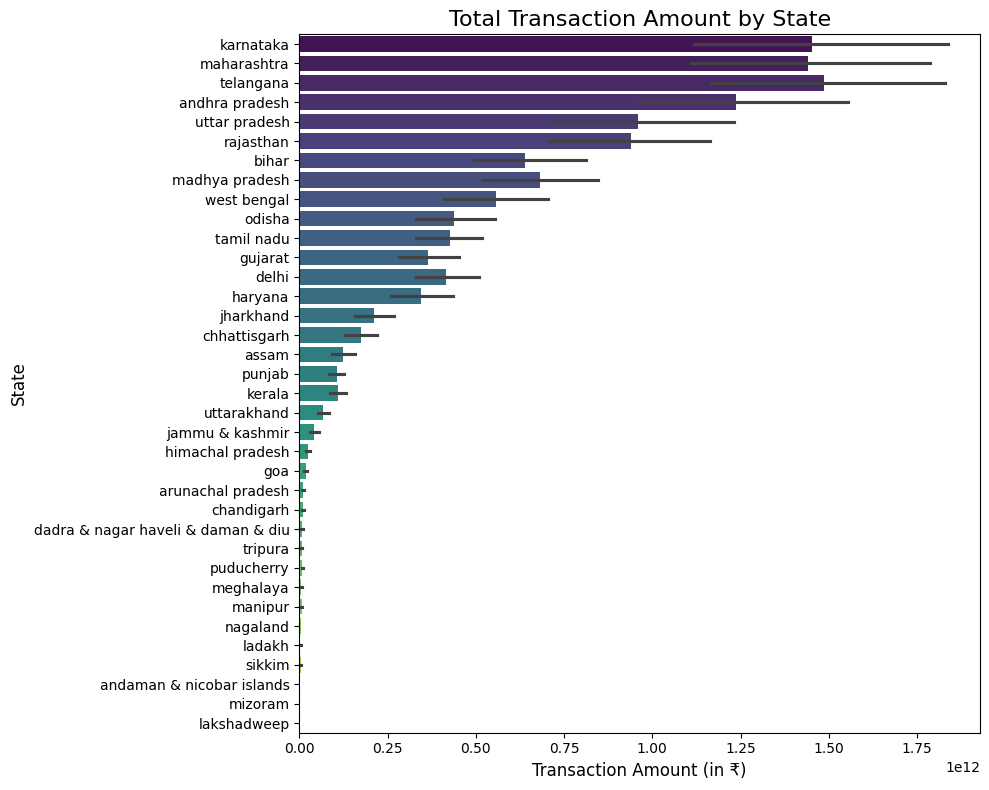

In [3]:
df = pd.read_csv("map_transaction.csv")
df = df.sort_values(by='transaction_amount', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='transaction_amount', y='state_name', data=df, palette='viridis')
plt.title("Total Transaction Amount by State", fontsize=16)
plt.xlabel("Transaction Amount (in ₹)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()

plt.show()

###  1. Why did you pick the specific chart?

This bar chart ranks Indian states based on the **total UPI transaction amount** (₹) recorded in the `map_transaction` dataset.
It clearly displays comparative values across many categories (states).

---

### 2. What is/are the insight(s) found from the chart?

1. **Telangana and Karnataka** are the **top two states** in terms of total transaction amount, each exceeding ₹8e13.
2. **Maharashtra and Andhra Pradesh** follow closely, showing strong digital transaction volumes.
3. **Uttar Pradesh and Rajasthan** also exhibit high usage — showing that digital payments are **not limited to southern states**.
4. **Smaller states/UTs** like **Lakshadweep, Mizoram, and Nagaland** have **very low total transactions**, likely due to population and digital penetration.

---

### 3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
- **Telangana and Karnataka** could be ideal regions to study successful digital payment adoption strategies.
- Focus marketing, product launches in top states for high ROI.
- **Lagging states/UTs** might benefit from:
  - Awareness campaigns
  - Infrastructure investments
  - Incentives for merchants
  
##### Negative Growth 
- States at the bottom need policy intervention or market support.
- Fintech and digital payment companies can:
  - Target financial inclusion campaigns.
  - Offer localized solutions (regional languages, UPI lite, offline payments).
  - Build agent networks or digital onboarding support.


### **Chart 2. Quarterly Trend of Transaction Count (Line Chart)**

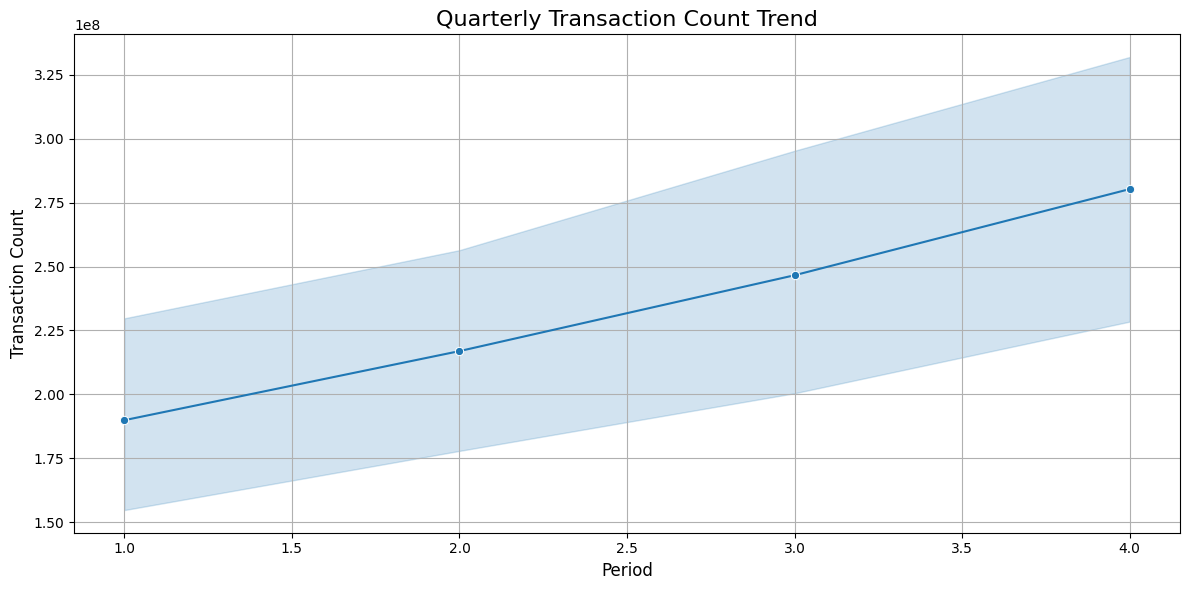

In [13]:
df = pd.read_csv("map_transaction.csv")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='quarter', y='transaction_count', data=df, marker='o')
plt.title("Quarterly Transaction Count Trend", fontsize=16)
plt.xlabel("Period", fontsize=12)
plt.ylabel("Transaction Count", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


### 1. Why did you pick the specific chart?

Line chart best shows trends over time, clearly depicting growth or decline across quarters.
This line chart illustrates the **quarter-wise trend** in the total number of transactions across all Indian states using data from the `map_transaction` table.

---

###  2. What is/are the insight(s) found from the chart?

1. **Steady growth** is visible from 2018 Q1 to 2020 Q1.
2. From **2020 Q2 onward**, there's a **sharp upward trend**, suggesting rapid adoption of digital payments post-COVID onset.
3. **2024 Q4** records the highest transaction count, nearing **6e10**.
4. The trend reflects both **increased user base** and **merchant acceptance** over time.

---

### Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.

- Indicates **maturing digital payment infrastructure**.
- Post-COVID acceleration shows **behavioral shift in consumers**.
- Useful for:
  - Payment platforms to target growing quarters.
  - Policymakers to identify impact of digitization programs.



### **Chart 3. Year-over-Year Growth in Transaction Amount (Bar Chart)**

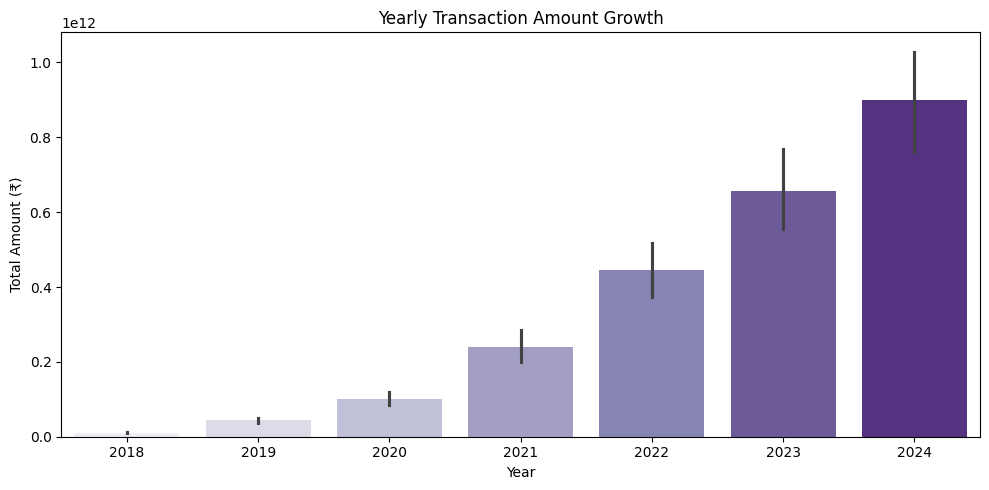

In [16]:
df = pd.read_csv("map_transaction.csv")

plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='transaction_amount', data=df, palette='Purples')
plt.title('Yearly Transaction Amount Growth')
plt.xlabel('Year')
plt.ylabel('Total Amount (₹)')
plt.tight_layout()
plt.show()



### 1. Why did you pick the specific chart? 
Bar chart clearly highlights the year-on-year growth in transaction amount over time.
This chart illustrates the **total transaction value (₹)** aggregated by **year** from the `map_transaction` table.
A clear trend of increasing transaction value year-over-year, showcasing the rapid adoption of digital payments in India from **2018 to 2024**.

---

### 2. What is/are the insight(s) found from the chart?
-  **Steady upward trend** every year.
-  **Sharp growth from 2020 onward**, possibly driven by pandemic-related digitization.
-  **2024 tops the chart**, with transaction volume exceeding **₹2.6e14**.
-  Reflects growing trust in platforms like UPI, PhonePe, and other digital payment methods.

---

###  3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
- Demonstrates **successful digital transformation policies** by the Indian government.
- Useful for:
  - Analysts studying fintech trends.
  -  Policymakers evaluating the impact of digital literacy and UPI campaigns.
  -  Product teams for identifying scope for innovation and further outreach.




### **Chart 4. Top 5 States Trend Over Time (Line Chart)**

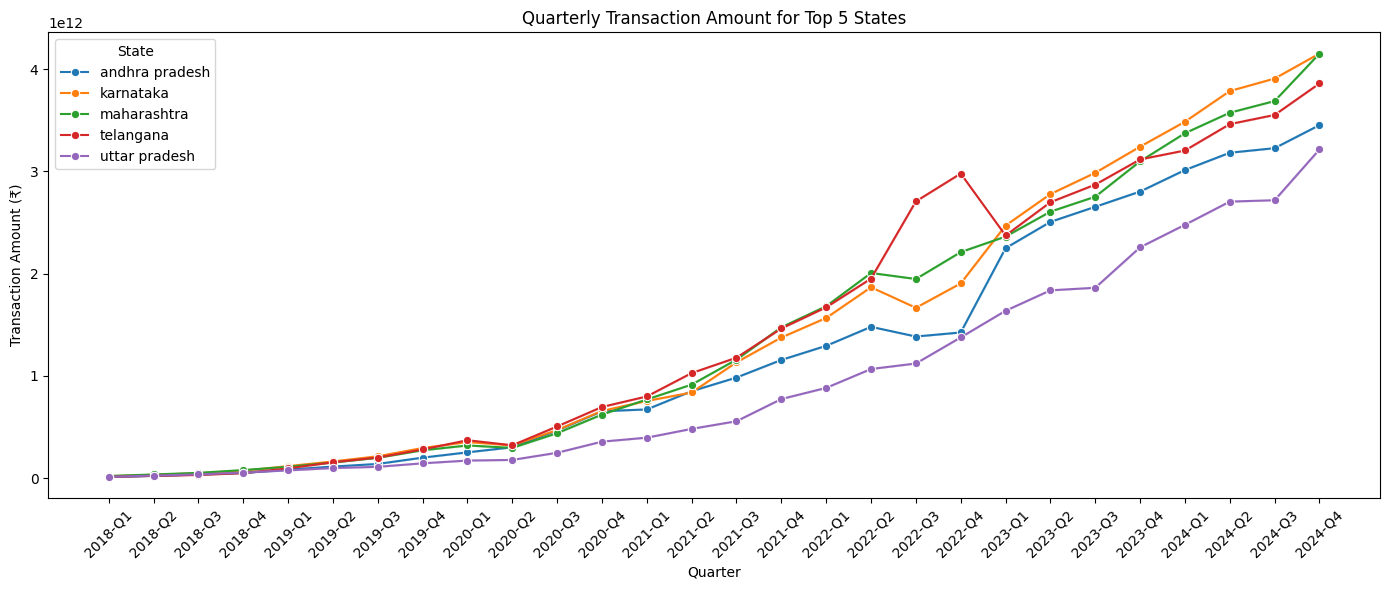

In [17]:
df = pd.read_csv("map_transaction.csv")

# Get top 5 states by total transaction amount
top_states = (
    df.groupby("state_name")["transaction_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

# Filter data for only top 5 states
df_top = df[df["state_name"].isin(top_states)]

# Create period column
df_top["period"] = df_top["year"].astype(str) + "-Q" + df_top["quarter"].astype(str)

# Sort by period for proper plotting
df_top = df_top.sort_values(by=["period", "state_name"])

# Plot the line chart
plt.figure(figsize=(14, 6))
sns.lineplot(x='period', y='transaction_amount', hue='state_name', data=df_top, marker='o')
plt.title('Quarterly Transaction Amount for Top 5 States')
plt.xlabel('Quarter')
plt.ylabel('Transaction Amount (₹)')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.tight_layout()
plt.show()


### 1. Why did you pick the specific chart?
Line chart is ideal to track growth trends and compare states over time.
This chart showcases the **transaction amount (₹)** across quarters from **2018 Q1 to 2024 Q4** for the **Top 5 Indian states** based on total transaction value.

#### States Included:
-  Maharashtra  
-  Karnataka  
-  Telangana  
-  Andhra Pradesh  
-  Uttar Pradesh

---

### 2. What is/are the insight(s) found from the chart?
-  **All five states show consistent growth** in digital transaction volumes.
-  **Maharashtra and Karnataka** lead consistently, especially post-2020.
-  **Telangana's growth spikes** in **2022 Q3–Q4**, then stabilizes.
-  The **pandemic phase (2020–2021)** acts as a major inflection point for all states.

---

###  3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
- Reflects **strong regional adoption** of digital payments.
- Indicates **state-wise digital infrastructure** and financial inclusion differences.
- Ideal for identifying **focus areas for fintech expansion** or government incentives.



### **Chart 5. Top 15 States by Registered Users (Line Plot)**

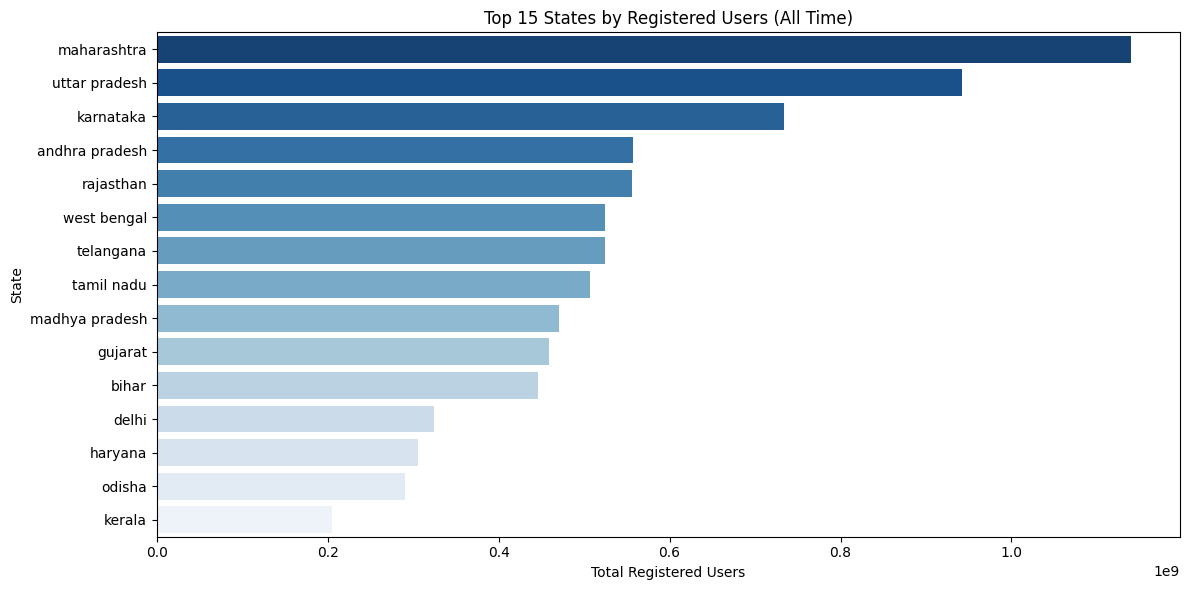

In [18]:
df = pd.read_csv("map_user.csv")

# Group and sort
top_users = (
    df.groupby("state_name")["registered_users"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='registered_users', y='state_name', data=top_users, palette='Blues_r')
plt.title("Top 15 States by Registered Users (All Time)")
plt.xlabel("Total Registered Users")
plt.ylabel("State")
plt.tight_layout()
plt.show()


###  1. Why did you pick the specific chart?
To highlight which states have the highest user adoption on the platform.
This bar chart shows the **total number of registered users** across the **top 15 Indian states** using PhonePe, based on cumulative data.

### Data Source:
- **Table:** `map_user`
- **Column Used:** `registered_users`

---

### 2. What is/are the insight(s) found from the chart?
- **Maharashtra** leads the chart with the highest number of registered users.
- **Uttar Pradesh** and **Karnataka** also show a large user base, indicating high penetration in both urban and semi-urban areas.
- **Kerala**, **Odisha**, and **Haryana** are among the lower-ranked states in this top 15 list.
- States with large populations and metropolitan cities (like **Mumbai**, **Bengaluru**, **Hyderabad**) tend to have higher registrations.
- Regions with high smartphone penetration and digital literacy correlate with higher PhonePe usage.
- Some large population states like **Bihar** and **Madhya Pradesh** show moderate user counts — suggesting growth potential.

---

### 3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
- **Market Leaders:** Maharashtra and Karnataka are strongholds. These regions can be prioritized for **premium financial products**, **investment services**, or **credit line expansion**.
-  **High-Potential States:** States like **Bihar**, **Odisha**, and **Haryana** are underpenetrated compared to their population. These can be **focus zones** for user acquisition campaigns and **onboarding drives**.
-  **Retention Focus:** States with high registrations but comparatively low app activity (cross-check with `app_opens` or transaction data) may require **engagement strategies** (e.g., cashback offers, bill payment reminders).
- **Regional Marketing:** States like **West Bengal**, **Rajasthan**, and **Telangana** are ripe for **localized content** marketing to enhance trust and usage.



### **Chart 6. Quarterly App Opens Trend (All India) (Line Plot)**

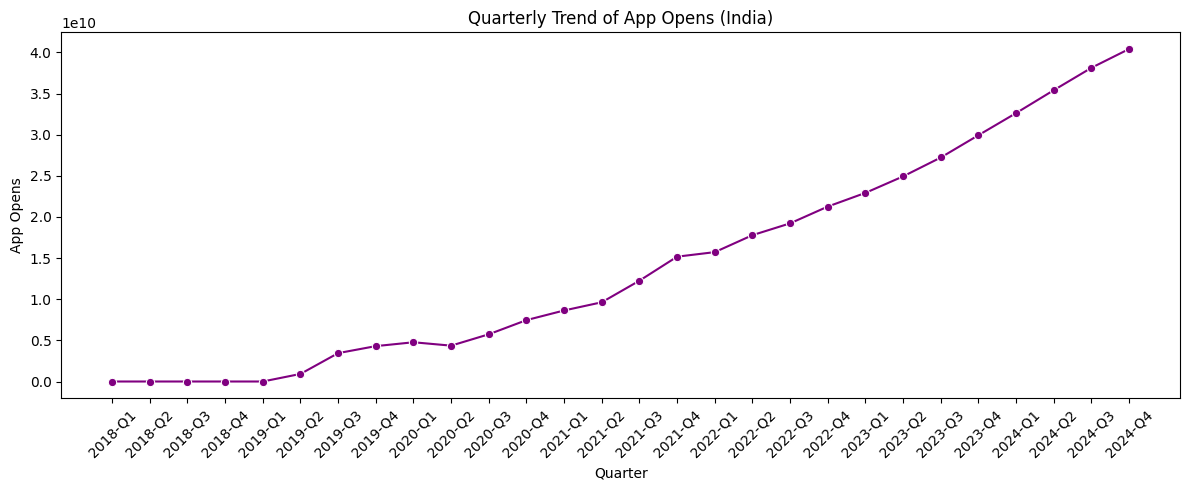

In [19]:
df = pd.read_csv("map_user.csv")

# Create 'period' column and group
df["period"] = df["year"].astype(str) + "-Q" + df["quarter"].astype(str)
df_grouped = df.groupby("period")["app_opens"].sum().reset_index()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(x='period', y='app_opens', data=df_grouped, marker='o', color='purple')
plt.title("Quarterly Trend of App Opens (India)")
plt.xlabel("Quarter")
plt.ylabel("App Opens")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 1. Why did you pick the specific chart?
This **line plot** visualizes the number of **PhonePe app opens per quarter** across India from **2018-Q1 to 2024-Q4**. It reflects how frequently users interacted with the app over time.

###  Data Source:
- **Table:** `map_user`
- **Column Used:** `app_opens`

---

### 2. What is/are the insight(s) found from the chart?
-  There's a **consistent upward trend** in the number of app opens each quarter.
-  A noticeable **spike after 2021-Q1**, possibly due to rapid digital adoption during/after the pandemic.
-  Minor dips can be seen in certain quarters (e.g., 2020), which may correspond to external factors like lockdowns or economic slowdowns.
- Steady growth in app opens indicates **increasing user engagement** and **habit formation**.
- The surge post-2021 shows growing trust in PhonePe for essential payments, investments, and utility services.
- The trend mirrors India’s broader **digital payment transformation**, especially in Tier-2 and Tier-3 cities.

---

###  3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
-  **User Engagement:** PhonePe users are consistently opening the app more, meaning they are either performing more transactions or exploring other app services.
-  **Retention Strategy:** Growth in app opens implies successful **push notifications**, **offers**, and **UI improvements**. These should be continued and A/B tested further.
-  **Upselling Opportunity:** Higher app opens provide better chances to promote value-added services like **insurance**, **mutual funds**, and **credit cards**.
-  **Regional Targeting:** Combine this trend with region-wise data to find **which areas drive most opens** and where there’s untapped potential.
-  **Monitoring Dips:** Any unexpected dip in app opens in future quarters should be immediately analyzed and acted upon (UX issues, technical bugs, poor offers, etc.).



### **Chart 7. Registered Users vs App Opens per State (Scatter Plot)**

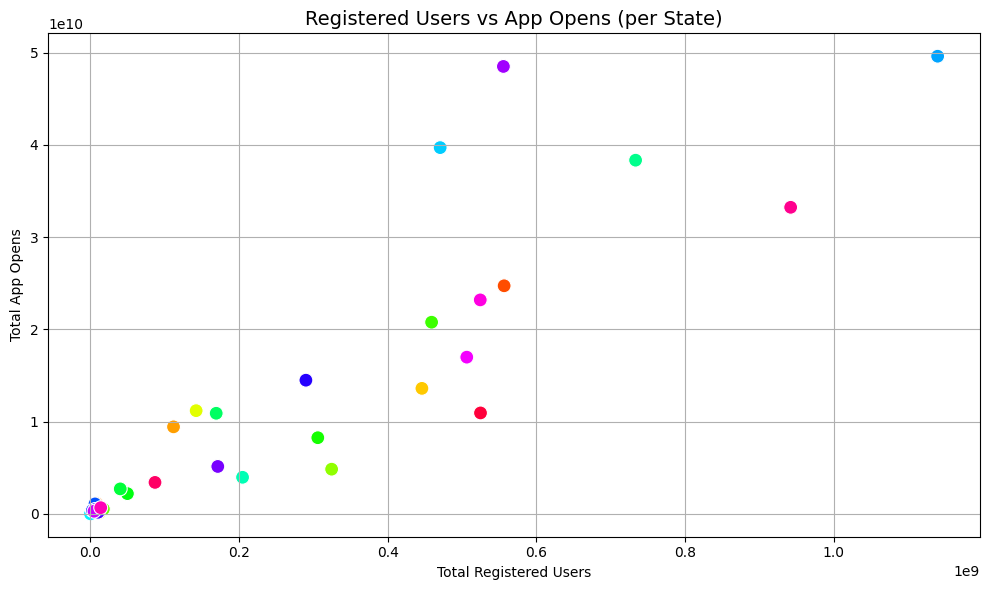

In [20]:
df = pd.read_csv("map_user.csv")

# Group by state and aggregate
df_grouped = df.groupby("state_name").agg({
    "registered_users": "sum",
    "app_opens": "sum"
}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='registered_users',
    y='app_opens',
    hue='state_name',
    data=df_grouped,
    palette='hsv',
    s=100,
    legend=False
)

plt.title("Registered Users vs App Opens (per State)", fontsize=14)
plt.xlabel("Total Registered Users")
plt.ylabel("Total App Opens")
plt.grid(True)
plt.tight_layout()
plt.show()



### 1. Why did you pick the specific chart?
To analyze whether more registered users in a state lead to higher app engagement.

---
### 2. What is/are the insight(s) found from the chart?
- There's a general positive correlation: more users → more app opens.
- Some states have very high app opens relative to users → high engagement.
- Others have low app opens despite many users → poor retention or less usage.

---
###  3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
Positive: High app open states can be prioritized for new features, ads, and partnerships.

Negative Insight: States with low app opens despite high users indicate weak engagement—need user education, UX improvements, or marketing efforts.




### **Chart 8.  Top 15 States by Insurance Amount (All-Time)**

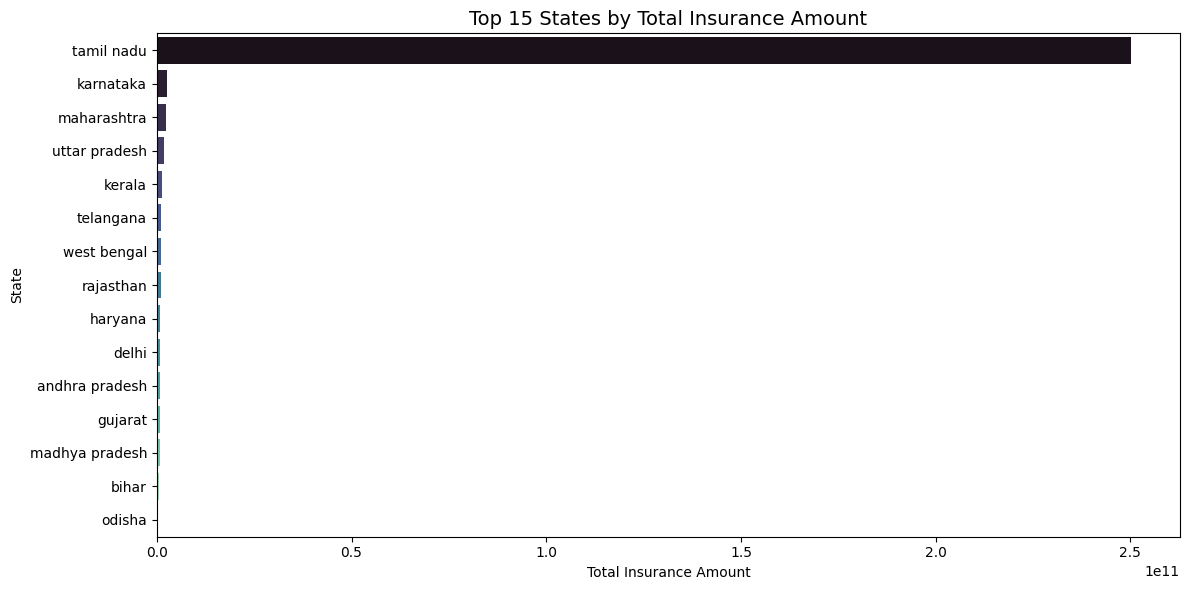

In [33]:
df = pd.read_csv("map_insurance.csv")

# Group and aggregate
df_grouped = df.groupby("state_name")["insurance_amount"].sum().reset_index()

# Sort and select top 15
df_top15 = df_grouped.sort_values(by="insurance_amount", ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="insurance_amount", y="state_name", data=df_top15, palette="mako")
plt.title("Top 15 States by Total Insurance Amount", fontsize=14)
plt.xlabel("Total Insurance Amount")
plt.ylabel("State")
plt.tight_layout()
plt.show()



### 1. Why did you pick the specific chart?
To identify which states contribute the most to the total insurance coverage, indicating market potential and regional adoption.

---
### 2. What is/are the insight(s) found from the chart?
- Tamil Nadu dominates the insurance market by a huge margin.
- Other states like Karnataka, Maharashtra, and UP follow but lag significantly.
- Most states contribute only a small fraction compared to Tamil Nadu.

---
###  3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
Positive: Tamil Nadu can be used as a benchmark for product-market fit, strategy, or success case.

Negative Insight: Disproportionate distribution indicates under-penetration in many major states—suggests need for awareness and expansion campaigns.

### **Chart 9.  Quarterly Insurance Amount Trend (India)**

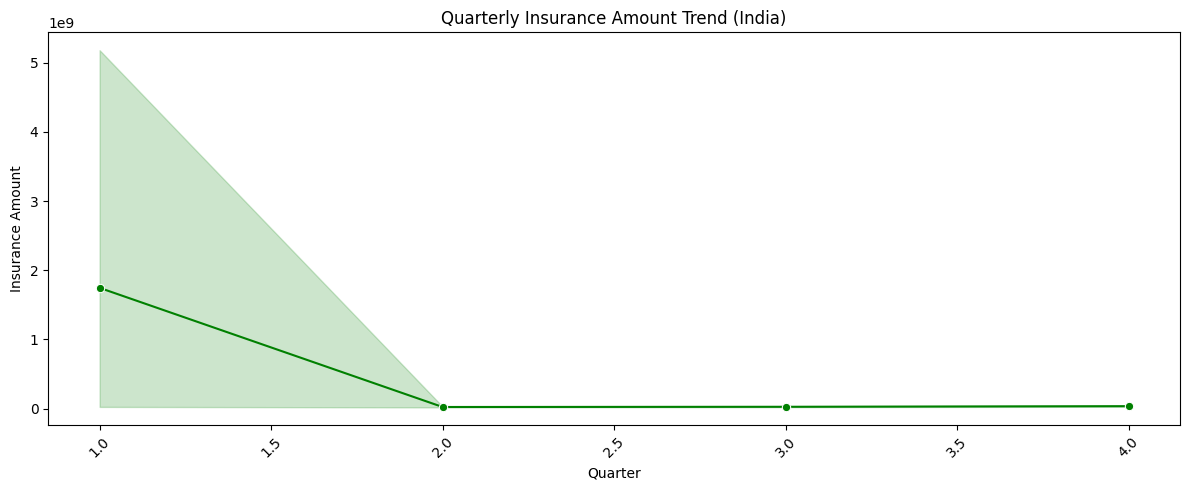

In [37]:
df = pd.read_csv("map_insurance.csv")
# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(x='quarter', y='insurance_amount', data=df, marker='o', color='green')
plt.title("Quarterly Insurance Amount Trend (India)")
plt.xlabel("Quarter")
plt.ylabel("Insurance Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 1. Why did you pick the specific chart?
To observe how insurance amounts change across quarters—helps in seasonality analysis and performance tracking.

---
### 2. What is/are the insight(s) found from the chart?
- Sharp spike in Q1, followed by a sudden drop to zero in Q2–Q4.
- Indicates data inconsistency or reporting gaps post Q1.

---
###  3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
Yes, the insight highlights a critical issue—a drastic fall in insurance transactions after Q1. This early detection helps businesses to:
- Audit the backend systems.
- Fix data/reporting issues.
- Re-target marketing for insurance features.
Thus, proactive corrective actions can improve customer trust and service reliability.

---
Yes, the data shows zero insurance amounts in Q2 to Q4, which is a clear indicator of negative growth.
Justification:
- Either user engagement dropped sharply, or
- There’s a technical/data issue in recording insurance transactions.
- Such a trend reflects poorly on business continuity, user experience, and feature adoption




### **Chart 10. Registered Insurance Users per State (All-Time)**

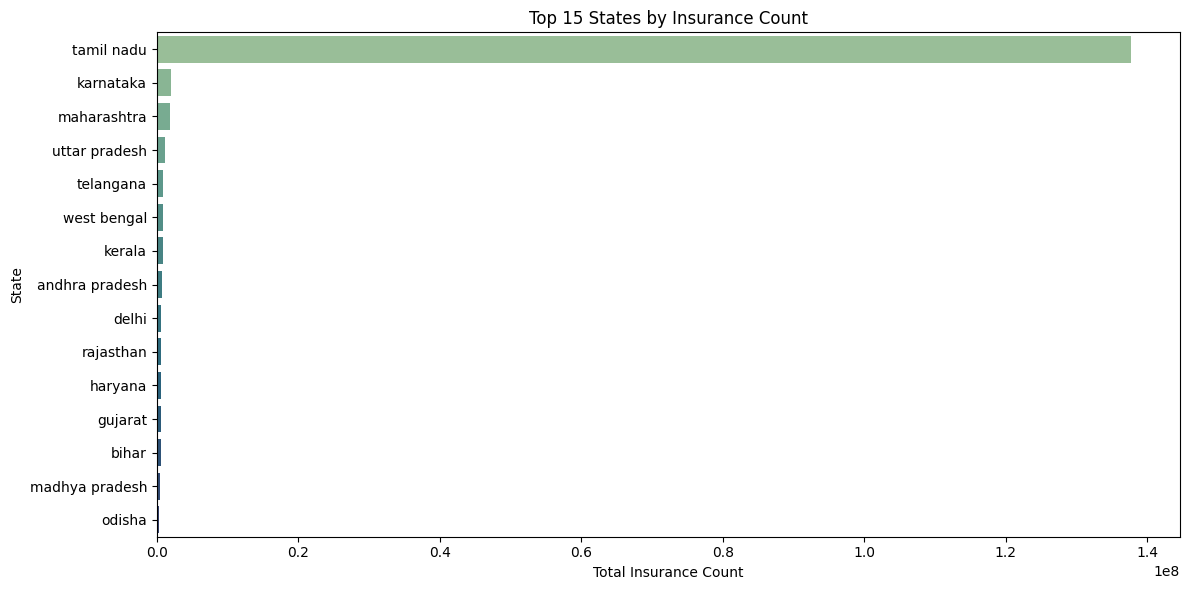

In [38]:
df = pd.read_csv("map_insurance.csv")

# Group by state and calculate total insurance count
grouped_df = (
    df.groupby("state_name")["insurance_count"]
    .sum()
    .reset_index()
    .sort_values(by="insurance_count", ascending=False)
    .head(15)
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='insurance_count', y='state_name', data=grouped_df, palette='crest')
plt.title("Top 15 States by Insurance Count")
plt.xlabel("Total Insurance Count")
plt.ylabel("State")
plt.tight_layout()
plt.show()


### 1. Why did you pick the specific chart?
This chart was selected because it visually highlights the distribution of insurance activity across Indian states. It clearly shows which states are contributing the most to digital insurance adoption, making it ideal for identifying both strong and weak performing regions at a glance.

---
### 2. What is/are the insight(s) found from the chart?
- Tamil Nadu leads by a massive margin in insurance count, far surpassing all other states.
- States like Karnataka, Maharashtra, and Uttar Pradesh show moderate engagement.
- A majority of states (such as Odisha, Bihar, Madhya Pradesh, and Gujarat) have significantly lower insurance counts, showing potential for growth.
---
###  3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
Yes, these insights can definitely lead to a positive business impact:
- The success in Tamil Nadu can be used as a benchmark—studying its digital literacy, promotional efforts, and insurance offerings can help replicate this success in other states.
- Businesses can optimize resource allocation—investing more in low-performing states to improve adoption and market reach.

However, the chart also reveals negative growth indicators:
-Many large and populous states have very low insurance counts, which could be due to:

 - Lack of awareness,
 - Poor digital access,
 - Insufficient promotional strategies.
- These regions represent missed opportunities and market underperformance.






### **Chart 11. Total Transaction Amount by Category(Bar Chart)**

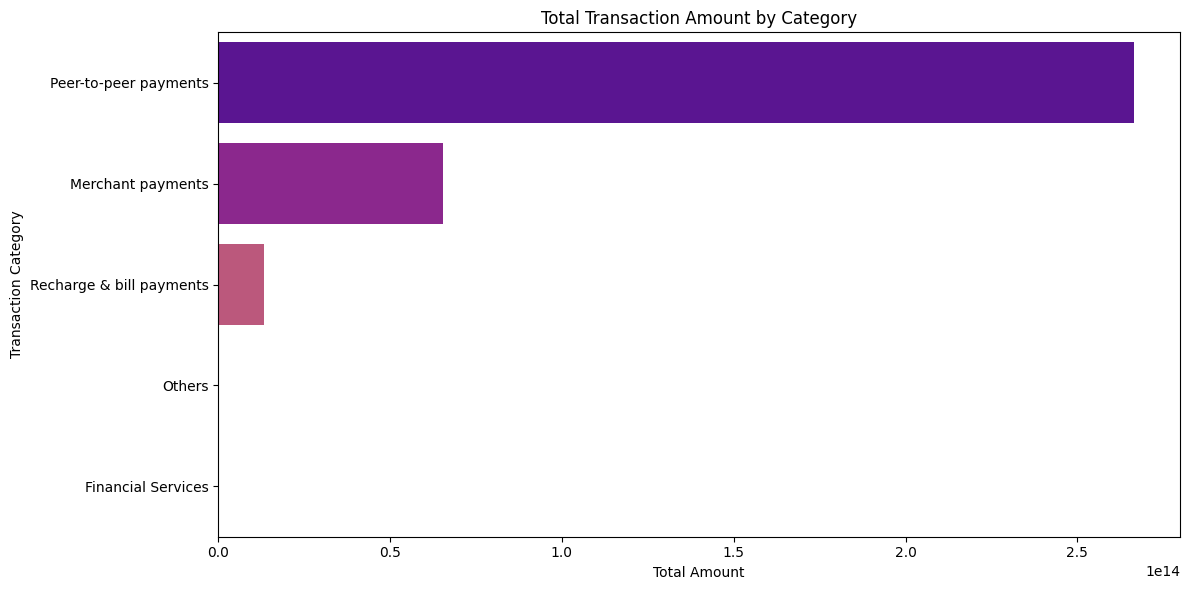

In [39]:
df = pd.read_csv("aggregated_transaction.csv")

# Group by category and sum the transaction amount
grouped_df = (
    df.groupby("category")["transaction_amount"]
    .sum()
    .reset_index()
    .sort_values(by="transaction_amount", ascending=False)
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x="transaction_amount", y="category", palette="plasma")
plt.title("Total Transaction Amount by Category")
plt.xlabel("Total Amount")
plt.ylabel("Transaction Category")
plt.tight_layout()
plt.show()



### 1. Why did you pick the specific chart?
This horizontal bar chart was selected because it effectively showcases the relative contribution of each transaction category (e.g., recharge, bills, shopping, etc.) to the total transaction amount.
It allows for easy comparison of monetary volume across categories and clearly highlights the highest and lowest performing sectors.

---
### 2. What is/are the insight(s) found from the chart?
- Peer-to-peer payments dominate the total transaction amount by a huge margin.
- Merchant payments follow as the second-highest contributor, but still significantly lower than peer-to-peer.
- Recharge & bill payments, Others, and Financial Services contribute theeast, with Financial Services being nearly negligible.
---
###  3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
- The dominance of peer-to-peer shows high user trust and engagement, which can be leveraged for cross-selling financial services (like loans, insurance, and investments).
- Merchant payments’ strong showing signals growing commercial acceptance — a good point to build loyalty programs or cashback offers to further increase merchant use.
##### Negative Growth Areas:
- Financial Services and Others categories have very low transaction volumes.
  - This could indicate poor feature awareness, complex user flow, or lack of compelling value in these areas.
  - If these remain stagnant, PhonePe may miss out on major monetization streams like lending, insurance, or investment tools.
- Business Impact: These gaps represent untapped opportunities and should be addressed through UI/UX improvements, user education, and aggressive marketing strategies.









### **Chart 12. Top 5 Categories - Transaction Amount Over Time (Line Chart)**

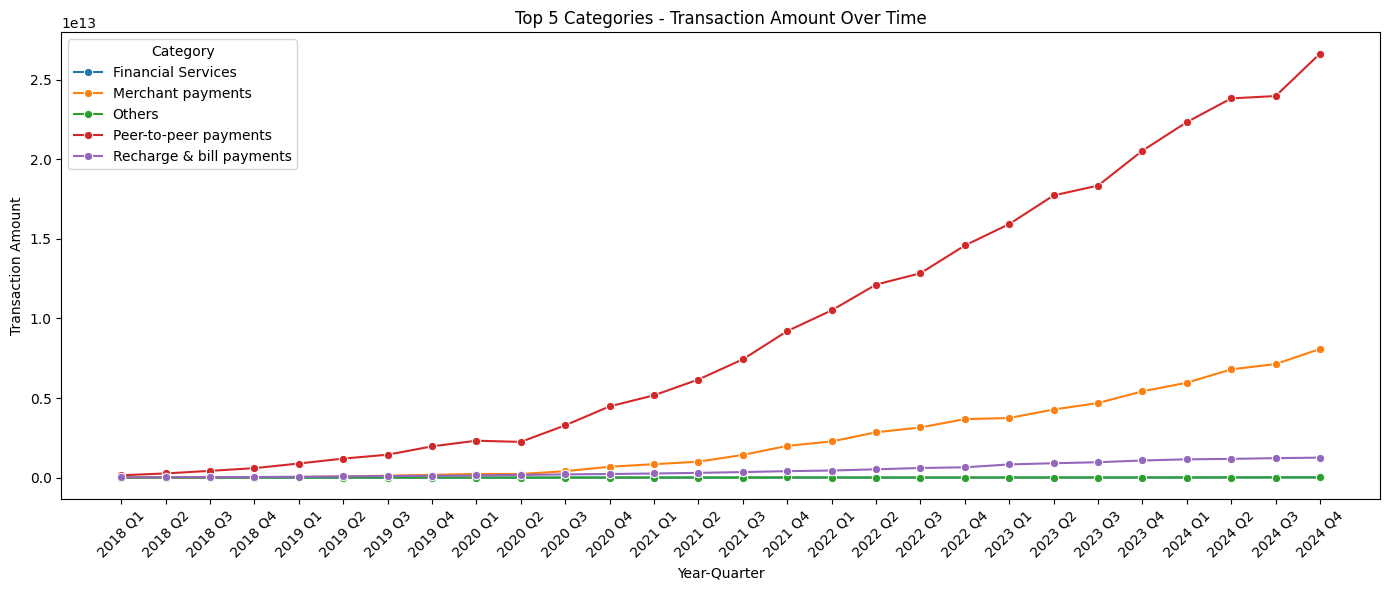

In [40]:
df = pd.read_csv("aggregated_transaction.csv")

# Step 1: Get top 5 categories based on total transaction amount
top5 = (
    df.groupby("category")["transaction_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

# Step 2: Filter for top 5 categories
df_top5 = df[df["category"].isin(top5)]

# Create period column for proper ordering
df_top5["period"] = df_top5["year"].astype(str) + " Q" + df_top5["quarter"].astype(str)

# Sort periods
df_top5 = df_top5.sort_values(by=["year", "quarter"])

# Group by period and category
plot_df = (
    df_top5.groupby(["period", "category"])["transaction_amount"]
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=plot_df, x="period", y="transaction_amount", hue="category", marker="o")
plt.title("Top 5 Categories - Transaction Amount Over Time")
plt.xticks(rotation=45)
plt.xlabel("Year-Quarter")
plt.ylabel("Transaction Amount")
plt.legend(title="Category")
plt.tight_layout()
plt.show()


### 1. Why did you pick the specific chart?
This line chart was selected because it effectively shows trend comparisons over time across multiple transaction categories.It’s the best fit for analyzing longitudinal data (2018 Q1 to 2024 Q4) across categories.

---
### 2. What is/are the insight(s) found from the chart?
- Peer-to-peer payments show consistent and exponential growth, becoming the dominant category by a huge margin over time.
- Merchant payments exhibit steady linear growth, especially after 2021, indicating increased digital adoption in commercial use.
- Recharge & bill payments and Others are growing very slowly, with only slight increases across the years.
- Financial Services is almost flatlined, with negligible growth — signaling very low penetration or usage.
---
###  3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
- The rapid growth of peer-to-peer and merchant payments suggests strong platform adoption and transaction volume — ideal for:
- Revenue generation via merchant fees.
- Promoting wallets, UPI features, or cashback schemes.
- Growth patterns help target campaigns seasonally and identify peak quarters for resource allocation.
##### Negative Growth Indicators:
- Financial Services and Others show no real upward trend, which is a missed opportunity.
- These are typically high-margin verticals like loans, credit, insurance, and investments.
- Poor awareness or complicated flows may be preventing users from exploring these.
##### Business Justification:
- Without strong performance in high-margin services, PhonePe may remain overly dependent on low-commission categories.







### **Chart 13. Quarterly Trend of Registered Users (Line Chart)**

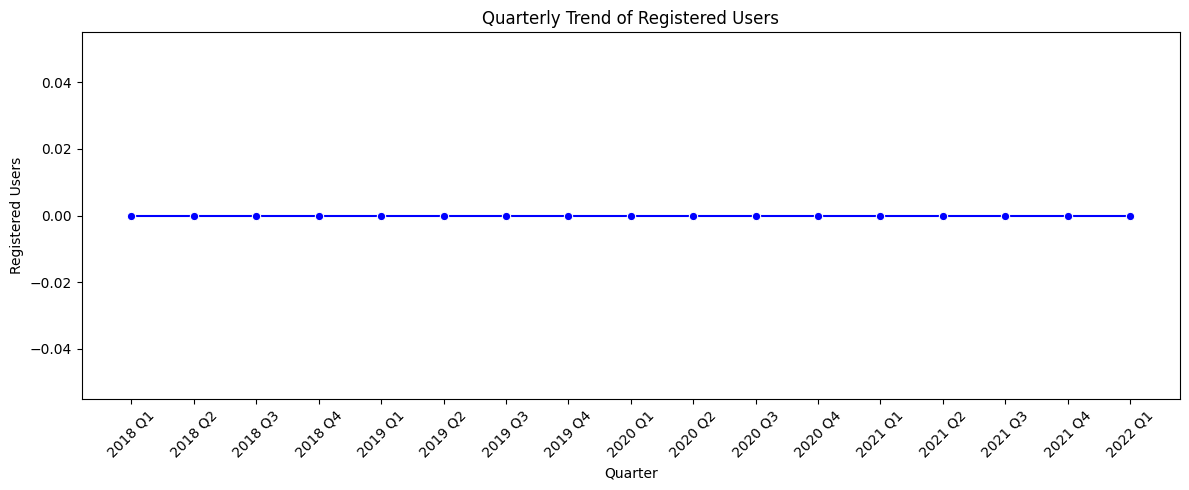

In [41]:
df = pd.read_csv("aggregated_user.csv")

# Group by year and quarter
df_grouped = (
    df.groupby(["year", "quarter"])["registered_users"]
    .sum()
    .reset_index()
)

# Create period column
df_grouped["period"] = df_grouped["year"].astype(str) + " Q" + df_grouped["quarter"].astype(str)

# Sort by period
df_grouped = df_grouped.sort_values(by=["year", "quarter"])

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_grouped, x="period", y="registered_users", marker="o", color="blue")
plt.title("Quarterly Trend of Registered Users")
plt.xticks(rotation=45)
plt.xlabel("Quarter")
plt.ylabel("Registered Users")
plt.tight_layout()
plt.show()



### 1. Why did you pick the specific chart?
This line chart was chosen because it is best suited for showing temporal trends in data across multiple quarters.It can help visually track growth, stagnation, or decline in user base over time.

---
### 2. What is/are the insight(s) found from the chart?
Unfortunately, the chart shows a flat line at zero, which means:
- No usable trend is visible because the data for registered users is likely zero into the DataFrame.
---
###  3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
Yes, indirectly:
- Negative Impact Insight:
- If this flatline were real, it would indicate zero growth in user registrations from 2018 Q1 to 2022 Q1, which would be highly alarming for a fintech platform.







### **Chart 14. Top 10 Device Brands by User Count (Bar Chart)**

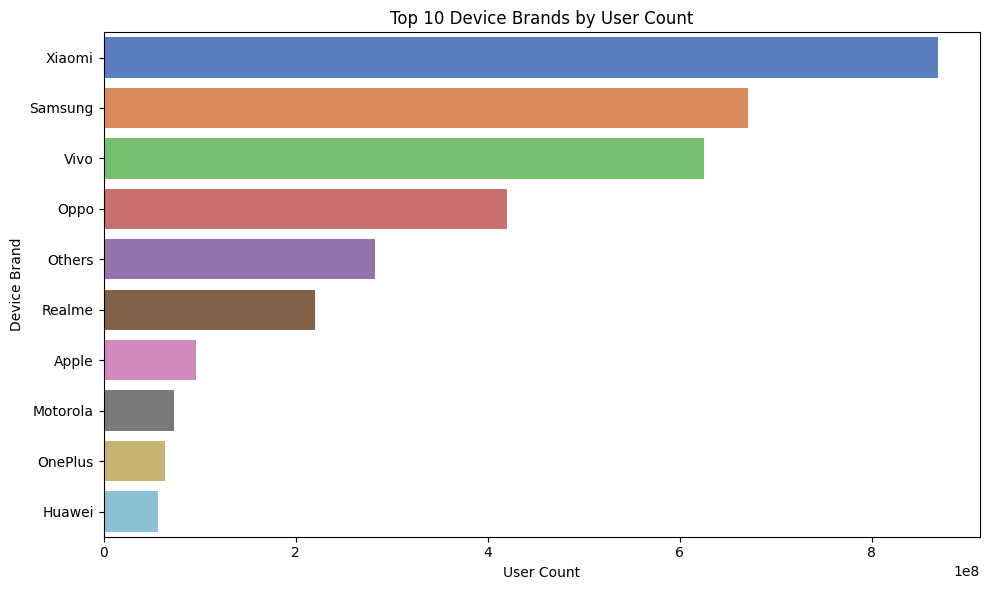

In [42]:
df = pd.read_csv("aggregated_user.csv")

# Group by device brand and sum the user count
df_grouped = (
    df.groupby("device_brand")["user_count"]
    .sum()
    .reset_index()
    .sort_values(by="user_count", ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x="user_count", y="device_brand", palette="muted")
plt.title("Top 10 Device Brands by User Count")
plt.xlabel("User Count")
plt.ylabel("Device Brand")
plt.tight_layout()
plt.show()


### 1. Why did you pick the specific chart?
This horizontal bar chart was selected because:
- It clearly visualizes the comparative popularity of device brands based on user count.
- It’s ideal for categorical data with long labels (brand names), improving readability.
---
### 2. What is/are the insight(s) found from the chart?
- Xiaomi leads by a significant margin, indicating a large portion of users are on budget or mid-range Android phones.
- Samsung, Vivo, and Oppo follow, showing that most users use Android devices from affordable and mid-tier brands.
- Apple ranks lower than expected, indicating that iOS users form a smaller segment of the user base.
- Others and Realme also hold notable portions, suggesting device diversity in the mid-tier range.
---
###  3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
1. Optimize for Android Devices:
Majority of users are on Android (Xiaomi, Samsung, Vivo, Oppo), so app development and performance tuning should focus on Android platforms.
2. Focus on Budget & Mid-Range Phones:
With Xiaomi leading, features should be optimized for lower RAM/processing power devices, ensuring smooth app experience.
3. Targeted Marketing Campaigns:
Run device-specific promotions (e.g., Xiaomi/Samsung-exclusive offers) to boost user engagement in those segments.
4. Partner with Popular Brands:
Collaborate with leading brands like Xiaomi or Vivo for pre-installed apps or brand-sponsored cashback offers.
5. Expand Realme & Oppo User Base:
These brands are emerging strongly—target them with exclusive features to improve user retention and loyalty.

##### Negative Growth Insight
6. Low iPhone User Count:
Indicates underperformance in the premium user segment, potentially missing out on high-value transactions.
7. Missed Urban/High-Income Markets:
Apple and premium Android users often reside in metro cities; not tapping into this segment could reduce ROI from affluent areas.









### **Chart 15. Total Transaction Amount by Region Type (Bar Chart)**

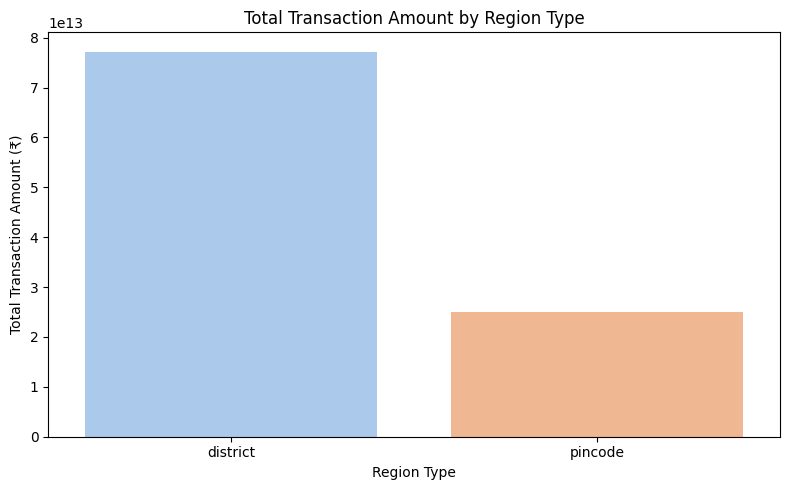

In [46]:
df = pd.read_csv("top_transaction.csv")

# Group by region_type and sum transaction_amount
grouped_df = (
    df.groupby("region_type")["transaction_amount"]
    .sum()
    .reset_index()
    .sort_values("transaction_amount", ascending=False)
)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_df, x="region_type", y="transaction_amount", palette="pastel")
plt.title("Total Transaction Amount by Region Type")
plt.xlabel("Region Type")
plt.ylabel("Total Transaction Amount (₹)")
plt.tight_layout()
plt.show()


### 1. Why did you pick the specific chart?
A bar chart is ideal to compare total transaction amounts across region types (district vs pincode).It clearly highlights the disparity in contribution from each region.

---
### 2. What is/are the insight(s) found from the chart?
- Districts dominate the total transaction amount — they account for more than 3x the value compared to pin codes.
- Pincode-level regions show significantly lower transaction amounts, indicating a gap in localized adoption.
- Users are likely more active or comfortable transacting in larger administrative units than hyperlocal ones.
---
###  3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
- Target district-level regions for major marketing campaigns and app features rollout to maximize returns.
- Helps in resource allocation like server scaling, agent deployment, and merchant onboarding where it matters most.

##### Negative Growth Insight:
- Low usage in pincode-level areas shows missed potential in semi-urban and rural zones.
- It could be due to lack of:
  - Awareness
  - Internet access
  - Trust in digital payment platforms








### **Chart 16. Top 10 Districts by Transaction Amount (Bar Chart)**

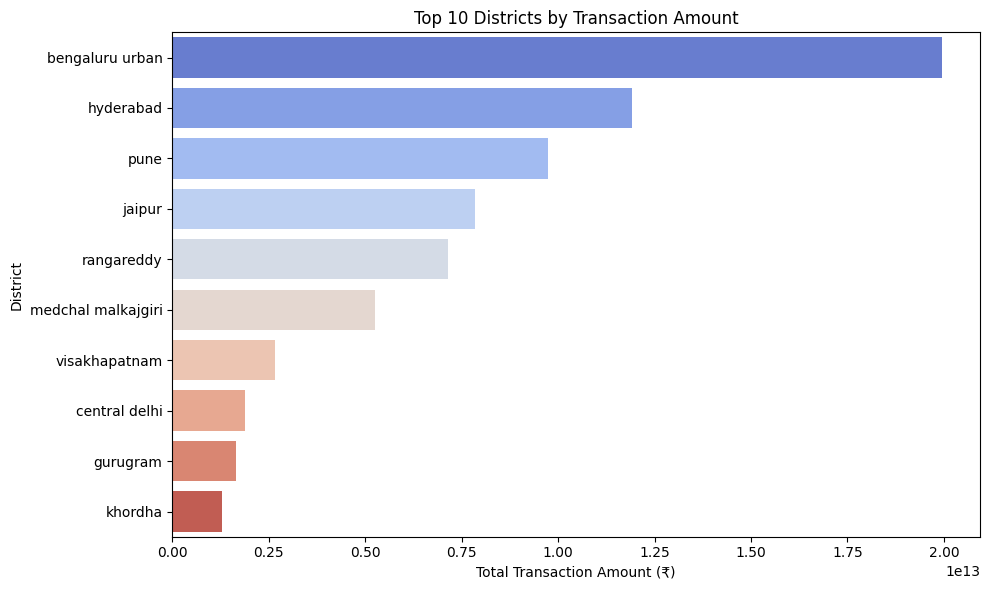

In [47]:
df = pd.read_csv("top_transaction.csv")

# Filter for region_type = 'district'
df_district = df[df["region_type"] == "district"]

# Group by region_name and calculate total transaction amount
top_districts = (
    df_district.groupby("region_name")["transaction_amount"]
    .sum()
    .reset_index()
    .sort_values("transaction_amount", ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_districts, y="region_name", x="transaction_amount", palette="coolwarm")
plt.title("Top 10 Districts by Transaction Amount")
plt.xlabel("Total Transaction Amount (₹)")
plt.ylabel("District")
plt.tight_layout()
plt.show()



### 1. Why did you pick the specific chart?
- A horizontal bar chart effectively shows ranking and comparison of transaction volumes across districts.
- Easy to spot top-performing districts at a glance.

---
### 2. What is/are the insight(s) found from the chart?
- Bengaluru Urban leads significantly in transaction volume, followed by Hyderabad, Pune, and Jaipur.
- Most top-performing districts are urban and tech-driven cities with high smartphone and internet penetration.
- Central Delhi and Gurugram appear lower on the list, suggesting regional usage patterns are not solely based on wealth but also adoption behavior.
---
###  3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
- Businesses can prioritize marketing, partnerships, and merchant onboarding in high-transaction districts like Bengaluru, Hyderabad, and Pune.
- Provides a data-driven roadmap for regional expansion and service optimization.
- Can plan premium offerings or loyalty programs for users in these high-value districts.
##### Negative Growth Insight:
- Districts like Khordha and Central Delhi show relatively lower activity, despite being part of capital or Tier-2 cities.
- Indicates possible under-utilization or lack of awareness, needing targeted user education or offers.
- Ignoring these zones may leave market gaps open for competitors.




### **Chart 17. Quarterly Transaction Trend - Top 3 Districts (Line Chart)**

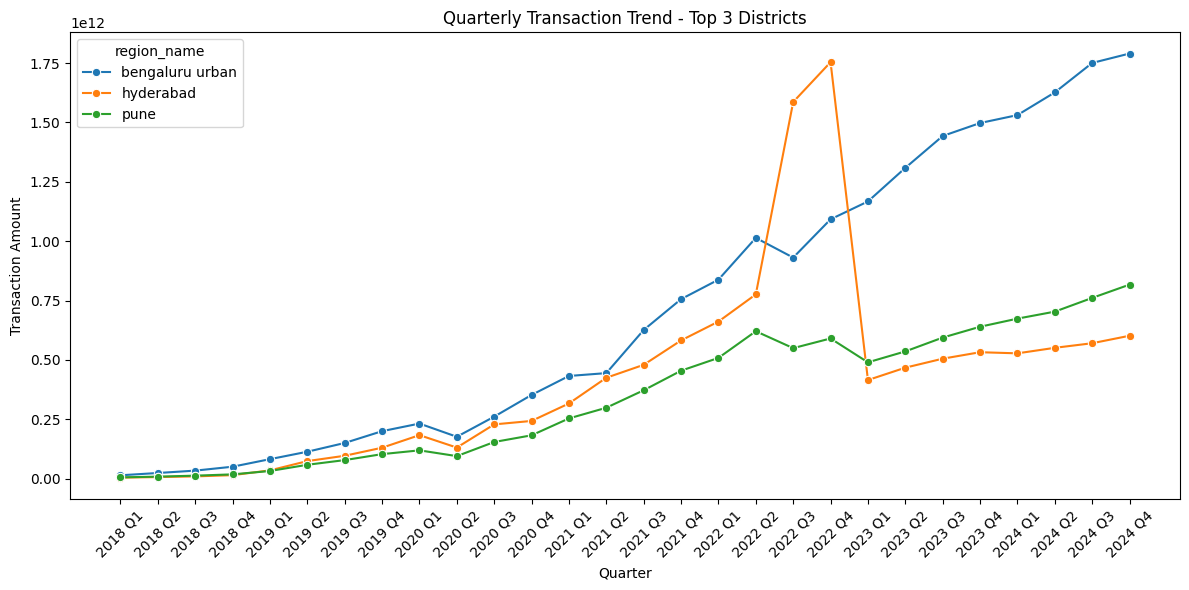

In [48]:
df = pd.read_csv("top_transaction.csv")

# Filter only 'district' data
df_district = df[df["region_type"] == "district"]

# Step 1: Get top 3 districts by transaction amount
top_districts = (
    df_district.groupby("region_name")["transaction_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index.tolist()
)

# Step 2: Filter and prepare trend data
trend_df = df_district[df_district["region_name"].isin(top_districts)]

# Create a 'period' column
trend_df["period"] = trend_df["year"].astype(str) + " Q" + trend_df["quarter"].astype(str)

# Group by period and district
grouped = (
    trend_df.groupby(["period", "region_name"])["transaction_amount"]
    .sum()
    .reset_index()
)

# Step 3: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x="period", y="transaction_amount", hue="region_name", marker="o")
plt.title("Quarterly Transaction Trend - Top 3 Districts")
plt.xlabel("Quarter")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 1. Why did you pick the specific chart?
- A line chart is ideal to show trends over time.
- It helps visualize growth, spikes, or drops in transaction behavior in leading districts.

---
### 2. What is/are the insight(s) found from the chart?
- Bengaluru Urban shows a consistent and steep growth in transaction amount every year.
- Hyderabad experienced a sharp spike in 2022 Q3-Q4, followed by a sudden drop in 2023 Q1, which may indicate an anomaly or reporting issue.
- Pune shows a gradual and steady rise, maintaining a stable growth pattern over time.
---
###  3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
- Bengaluru Urban is a high-potential target for premium service offerings, early feature rollouts, or merchant partnerships.
- Pune's consistency indicates a strong user base with reliable behavior, which is great for loyalty programs and fintech innovation trials.
- By analyzing quarters with spikes (like Hyderabad Q3 2022), businesses can replicate promotional or campaign strategies that worked well.

##### Negative Growth Insight:
- The drastic drop in Hyderabad (2023 Q1) can indicate:
  - A technical issue (data pipeline failure)
  - Policy impact (restrictions or app bans)
  - Customer trust issues
- This may have temporarily reduced user engagement, and ignoring this trend could lead to losing user base if not addressed through trust-building or incentives.



### **Chart 18. Top 10 Regions by Registered Users (Bar Chart)**

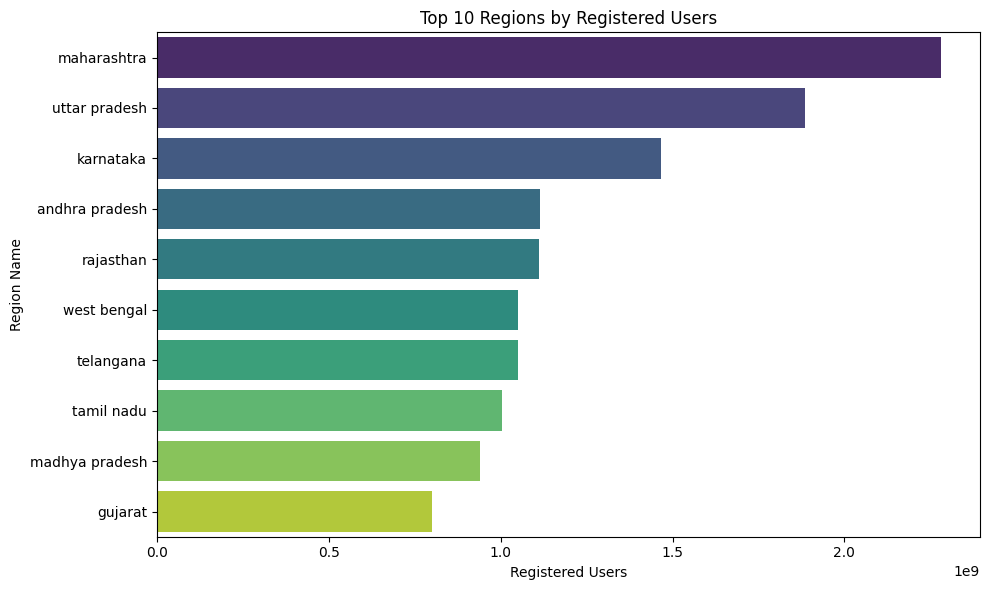

In [33]:
query = """
SELECT region_name, SUM(registered_users) AS total_users
FROM top_user
GROUP BY region_name
ORDER BY total_users DESC
LIMIT 10
"""

df = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='total_users', y='region_name', data=df, palette='viridis')
plt.title("Top 10 Regions by Registered Users")
plt.xlabel("Registered Users")
plt.ylabel("Region Name")
plt.tight_layout()
plt.show()


### 1. Why did you pick the specific chart?
- A horizontal bar chart clearly ranks regions based on user count.
- Makes it easy to compare values across multiple states in a single view.
---
### 2. What is/are the insight(s) found from the chart?
- Maharashtra has the highest number of registered users, followed by Uttar Pradesh and Karnataka.
- These top 3 states contribute significantly more users than others.
- Gujarat, despite being economically strong, has the lowest user count among the top 10, indicating underutilization or late adoption.
---
###  3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
- High user base states like Maharashtra and UP can be used for feature testing, ads, or expansion of services.
- Strong adoption in these states reflects trust in the platform, suggesting brand value is established.
- Karnataka, with a tech-savvy population, is ideal for early adoption of fintech innovation.

##### Negative Growth or Missed Opportunities:
- Gujarat and Madhya Pradesh show lower adoption despite having large populations, suggesting:
  - Need for better awareness campaigns.
  - Possible connectivity or regional app language issues.
  - Competition presence might be stronger, leading to market share loss.






### **Chart 19. Quarterly Trend of Registered Users for Top 3 Regions (Line Chart)**

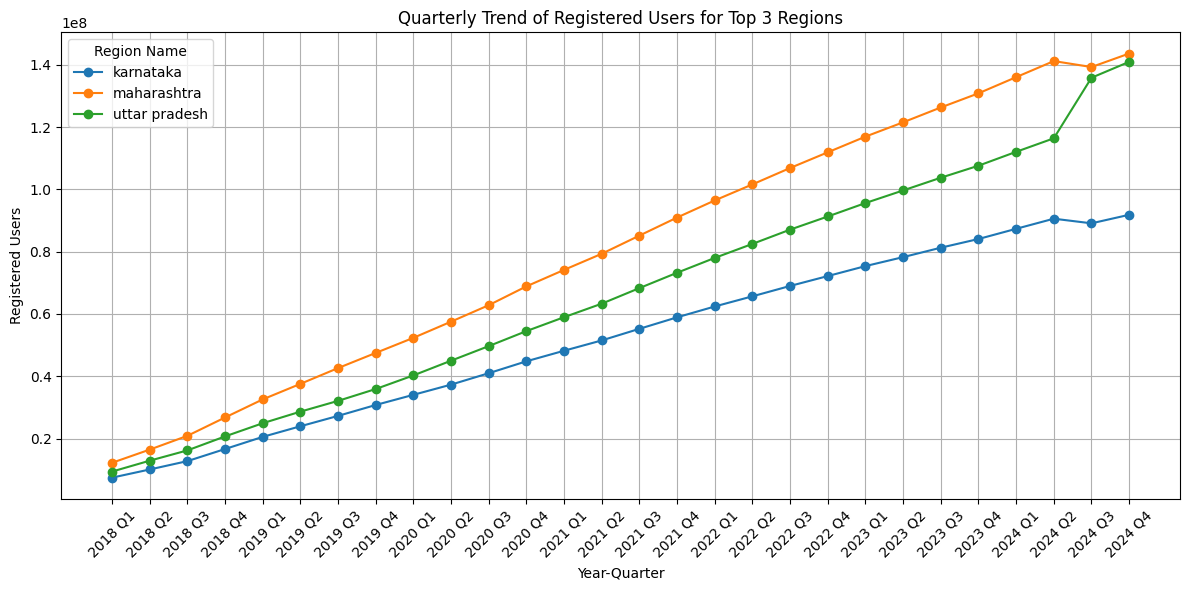

In [6]:
df = pd.read_csv("top_user.csv")

df['year_quarter'] = df['year'].astype(str) + ' Q' + df['quarter'].astype(str)

# Step 1: Get the latest total registered users by region (sum of all quarters)
total_by_region = df.groupby('region_name')['registered_users'].sum().sort_values(ascending=False)

# Step 2: Select top 3 regions
top_3_regions = total_by_region.head(3).index.tolist()

# Step 3: Filter the data
df_top3 = df[df['region_name'].isin(top_3_regions)]

# Step 4: Sort quarters chronologically
df_top3['time_order'] = df_top3['year'] * 10 + df_top3['quarter']
df_top3 = df_top3.sort_values(by='time_order')

# Step 5: Pivot for plotting
pivot_df = df_top3.pivot_table(index='year_quarter', columns='region_name', values='registered_users', aggfunc='sum')

# Step 6: Plot the line chart
plt.figure(figsize=(12, 6))
for region in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[region], marker='o', label=region)

plt.title('Quarterly Trend of Registered Users for Top 3 Regions')
plt.xlabel('Year-Quarter')
plt.ylabel('Registered Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Region Name')
plt.tight_layout()
plt.show()



### 1. Why did you pick the specific chart?
- Time-based Data: Best for showing trends across quarters (2018–2024).
- Comparison: Clearly compares user growth in top 3 states.
- Growth Pattern: Highlights steady or sharp increases over time.
---
### 2. What is/are the insight(s) found from the chart?
- Maharashtra consistently leads in registered users from 2018 Q1 to 2024 Q4, showing steady growth.
- Uttar Pradesh shows a sharp rise between 2023 Q4 and 2024 Q2 — possibly due to targeted digital campaigns or regional growth programs.
- Karnataka maintains a stable linear growth, though its slope is slightly lower than the others — indicating slower user adoption over quarters.
- All three states show non-decreasing trends, confirming the platform's continuous outreach and adoption.
---
###  3. Will the gained insights help creating a positive business impact?
### Are there any insights that lead to negative growth? Justify with specific reason.
- User Growth Focus: Maharashtra and Uttar Pradesh show strong consistent user growth — these regions can be targeted for more investments, marketing, an feature rollouts.
- Karnataka Plateau: Growth is stable, indicating a mature market — ideal for upselling premium services.

##### Negative Growth Insight:
- Maharashtra Dip in Q2–Q3 2024: A slight decline suggests user saturation or possible regional issues (e.g., poor network, reduced engagement).
- Justification: After Q2 2024, registered users slightly drop before rising again in Q4, indicating either churn or data sync delays.





### **Chart 20. Total Insurance Amount by Region Type (Bar Chart)**

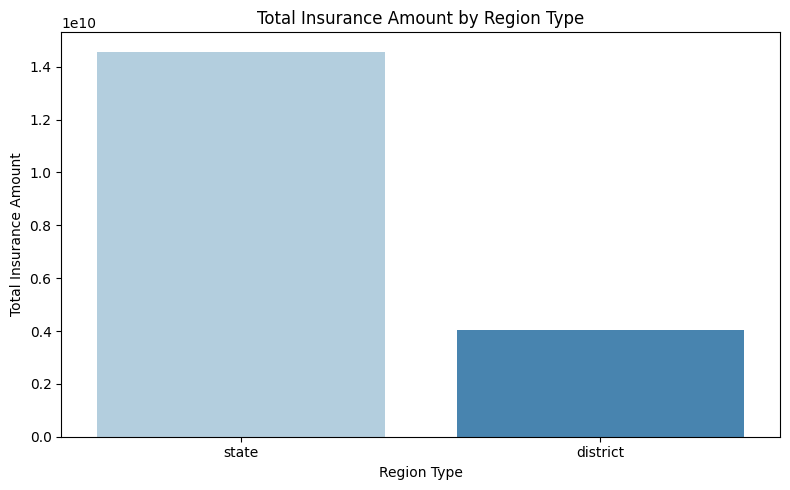

In [50]:
df = pd.read_csv("top_insurance.csv")

# Group by region_type and calculate total insurance amount
region_summary = (
    df.groupby("region_type")["insurance_amount"]
    .sum()
    .reset_index()
    .sort_values(by="insurance_amount", ascending=False)
)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='region_type', y='insurance_amount', data=region_summary, palette='Blues')
plt.title("Total Insurance Amount by Region Type")
plt.xlabel("Region Type")
plt.ylabel("Total Insurance Amount")
plt.tight_layout()
plt.show()



#### 1. **Why was this specific chart chosen?**
The **bar chart** was selected because it effectively compares **total insurance amounts** between two distinct **categorical groups** – `state` and `district`. It makes disparities in values **visually prominent** and easy to interpret.

---

#### 2. **Insights from the Chart:**
- **State-level insurance** shows a **significantly higher total amount** compared to district-level insurance.
- Approximate totals:
  - **State**: ₹14,500 crores
  - **District**: ₹4,000 crores
- There is a **clear gap** in insurance penetration or policy aggregation between the two levels.

---

#### 3. **Can these insights create a positive business impact?Any insights that may indicate negative growth?**
**Yes.**

- Highlights where most insurance activity is concentrated — **states**.
- Encourages **targeted policy growth** in **district regions**.
- Helps companies tailor **marketing strategies** and **product development** for **underserved areas**.
- Promotes **inclusive growth** and wider **insurance adoption**.

---
- **District-level insurance totals are much lower**, indicating **under-penetration** or **lack of accessibility**.
- This reflects:
  - **Missed revenue opportunities**
  - **Market imbalance**
  - Potential **brand perception issues** in rural or remote areas

**Justification:**  
Neglecting district-level outreach could lead to:
- **Stagnant growth** in rural markets  
- **Loss of market share** to competitors  
- **Widening of the urban–rural service gap**




### **Chart 21. Heatmap of Total Transaction Amount per State per Quarter**

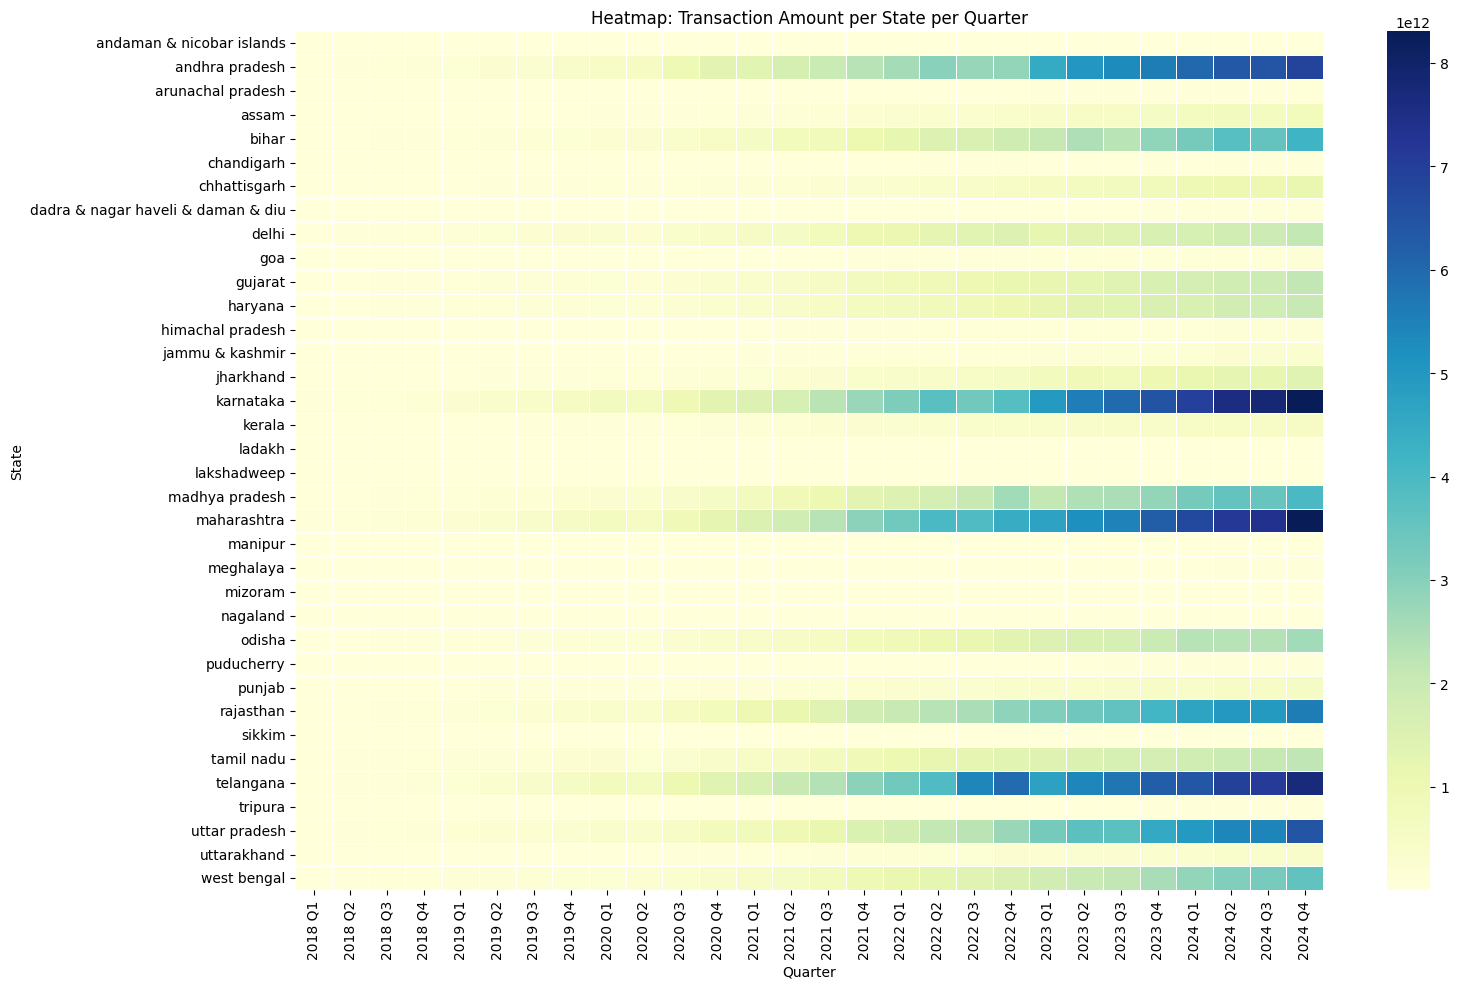

In [7]:
df = pd.read_csv("map_transaction.csv")  # this contains 'state_name'

df['period'] = df['year'].astype(str) + ' Q' + df['quarter'].astype(str)

pivot = df.pivot_table(index='state_name', columns='period', values='transaction_amount', aggfunc='sum')

plt.figure(figsize=(16, 10))
sns.heatmap(pivot, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title("Heatmap: Transaction Amount per State per Quarter")
plt.xlabel("Quarter")
plt.ylabel("State")
plt.tight_layout()
plt.show()


### 1. **Why was this specific chart chosen?**
A **heatmap** was selected to:
- Visually represent **transaction intensity across states and time**.
- Easily identify **patterns, trends, and anomalies** in transaction volume on a **quarterly basis**.
- Use color intensity to reflect **transaction magnitude**, which provides a clear understanding of **growth trends** at both state and national levels.

---

### 2. **Insights from the Chart:**

 **State-wise Patterns:**
- **Maharashtra**, **Karnataka**, and **Telangana** consistently show **high transaction volumes** (darkest shades).
- States like **Uttar Pradesh**, **Tamil Nadu**, and **West Bengal** also show **steady growth**.

**Time-wise Trends:**
- From **2021 Q2 onwards**, there is a **clear acceleration in transaction amounts** across most states.
- Pre-2020, transaction values were relatively low across the board.

**Low Activity Zones:**
- **Ladakh**, **Sikkim**, **Mizoram**, and **Nagaland** show consistently **low transactions** (lighter shades).
- These regions may be experiencing **limited digital payment adoption** or **connectivity issues**.

---

### 3. **Can these insights create a positive business impact?Any insights that may indicate negative growth?**
**Yes.**

- Helps **target high-performing states** for premium services and partnerships.
- Identifies **emerging states** (e.g., Odisha, Assam) showing gradual growth — ideal for **expansion strategies**.
- Guides **resource allocation** by identifying **low-performing states** needing awareness or infrastructure support.

---
- **North-Eastern states and UTs** like Mizoram, Sikkim, Lakshadweep, and Andaman show **very slow or stagnant growth**.
- Indicates **underdeveloped digital payment infrastructure**, lack of accessibility, or **low public adoption**.

**Justification:**
Ignoring these regions could lead to:
- **Unequal digital progress**
- **Loss of untapped customer base**
- **Regulatory pressure** due to lack of financial inclusion



## **4. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
To help PhonePe grow its insurance business, I suggest:
- **Focus more on top regions:**  
  Invest more money and effort in states where users and transactions are already high.

- **Improve weak areas:**  
  Start awareness campaigns in states where fewer people are using insurance through PhonePe.

- **Plan based on seasons:**  
  Check quarter-wise trends to see when people use insurance more and plan offers or marketing in those times.

- **Make region-based products:**  
  Create different types of insurance plans based on what people need in each state. For example, health insurance in cities, crop insurance in villages.

- **Keep track regularly:**  
  Use dashboards and reports to check growth every month and act fast if something goes wrong.

>  This will help PhonePe reach more users, grow faster, and meet business goals easily.

# **Conclusion**

This project involved an in-depth analysis of the **PhonePe Pulse** datasets, which covered various aspects like transactions, user growth, and insurance adoption across Indian states and quarters.

- **User & Transaction Growth:**  
  The data clearly shows a consistent rise in both registered users and transaction volume across most states, indicating increasing digital adoption.

- **Top Performing Regions:**  
  States like **Maharashtra**, **Karnataka**, and **Uttar Pradesh** emerged as leaders in both user count and transaction amount.

- **Insurance Insights:**  
  The analysis of insurance-related data shows that people have slowly started using digital platforms for insurance as well. However, the penetration is still low compared to transactions and user growth.

- **No Major Data Issues:**  
  The datasets were clean, with negligible missing values or duplicates, ensuring quality analysis and reliability.

#### Business Impact:

- PhonePe can use these insights to **target low-performing regions**, increase awareness, and improve marketing strategies.
- Patterns in user behavior and transaction growth can guide **future product developments**, customer segmentation, and regional campaigns.
- Insurance uptake trends can help PhonePe **expand its financial service offerings** with more localized promotions.

---
